In [8]:
import pandas as pd
import numpy as np

# Visualization
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## Loading Dataset

In [7]:
BANK_DATA = pd.read_csv('Data/bank-additional-full.csv',sep = ';')
BANK_DATA.shape

(41188, 21)

# STARTING OF PROJECT

In [181]:
df = BANK_DATA.copy()
df.shape

(41188, 21)

In [182]:
df.head()

age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  
0          93.994          -36.4      4.857       5191.0  no  
1          93.994          -36.4      4.857       5191.0  no  
2          93.994          -36.4      4.857       5191.0  no  
3          93.994          -36.4      4.857       5191.0  no  
4          93.994          -36.4      4.857       5191.0  no  

[5 rows x 21 columns]

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

### Input features:
1. age - client age in years (numeric)
2. job - type of job (categorical: admin., blue-collar, entrepreneur, housemaid, management, retired, self-employed, services, student, technician, unemployed, unknown)
3. marital - marital status (categorical: divorced, married, single, unknown)
4. education - client education (categorical: basic.4y, basic.6y, basic.9y, high.school, illiterate, professional.course, university.degree, unknown)
5. default - has credit in default? (categorical: no, yes, unknown)
6. housing - has housing loan? (categorical: no, yes, unknown)
7. loan - has personal loan? (categorical: no, yes, unknown)
8. contact - contact communication type (categorical: cellular, telephone)
9. month - last contact month of the year (categorical: jan, feb, mar, ..., nov, dec)
10. day_of_week - last contact day of the week (categorical: mon, tue, wed, thu, fri)
11. duration - last contact duration, in seconds (numeric).
12. campaign - number of contacts performed for this client during this campaign (numeric, includes last contact)
13. pdays - number of days that have passed after the client was last contacted from the previous campaign (numeric; 999 means the client has not been previously contacted)
14. previous - number of contacts performed for this client before this campaign (numeric)
15. poutcome - outcome of the previous marketing campaign (categorical: failure, nonexistent, success)
16. emp.var.rate - employment variation rate, quarterly indicator (numeric)
17. cons.price.idx - consumer price index, monthly indicator (numeric)
18. cons.conf.idx - consumer confidence index, monthly indicator (numeric)
19. euribor3m - euribor 3 month rate, daily indicator (numeric)
20. nr.employed - number of employees, quarterly indicator (numeric)

### Output feature:
y - has the client subscribed a term deposit? (binary: yes,no)

In [322]:
df.y.value_counts()

no     36548
yes     4640
Name: y, dtype: int64

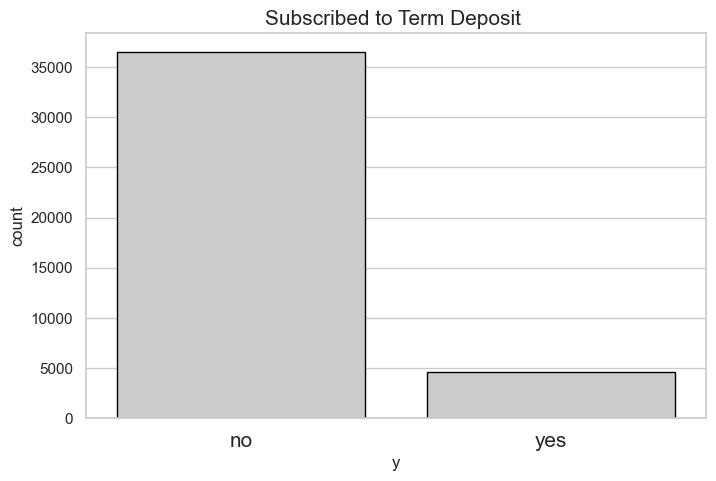

In [460]:
plt.figure(figsize = (8,5))
sns.countplot(x='y',data=df, color = '0.8', edgecolor='black')
plt.title("Subscribed to Term Deposit ",fontsize=15)
plt.xticks(fontsize=15)
plt.show()

* **Clearly its a unbalanced dataset**

In [9]:
df.dtypes.value_counts()

object     11
int64       5
float64     5
dtype: int64

# Exploratory Data Analysis

### Numeric Data

In [325]:
num_cols = list(df.select_dtypes(include=['number']))
df[num_cols].nunique()

age                 78
duration          1544
campaign            42
pdays               27
previous             8
emp.var.rate        10
cons.price.idx      26
cons.conf.idx       26
euribor3m          316
nr.employed         11
dtype: int64

<Axes: >

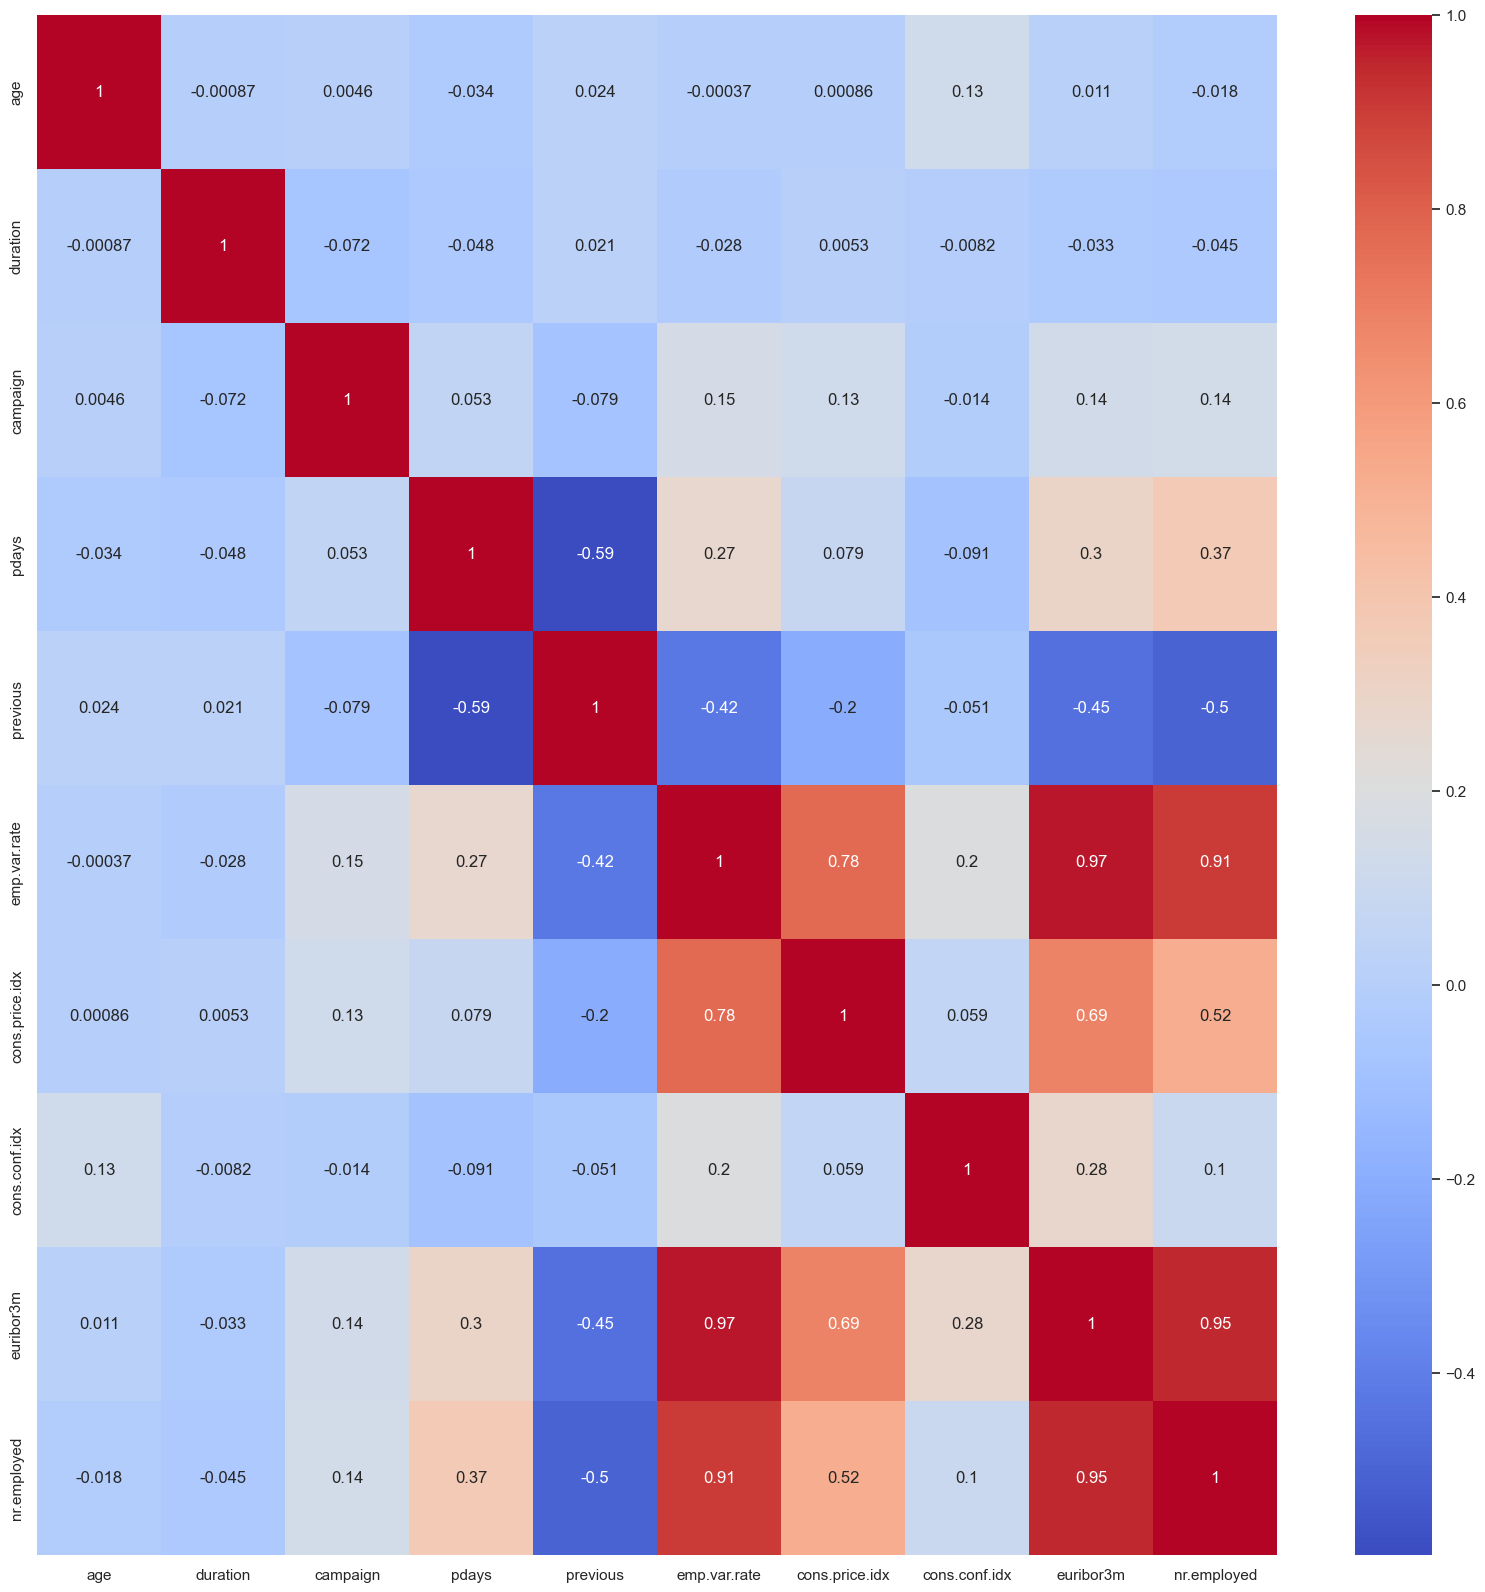

In [326]:
plt.figure(figsize=(20,20))
sns.heatmap(df[num_cols].corr(),annot=True,cmap='coolwarm')

* **Number of Employees**, **Euro Interbank Offered Rate**, **Employment Variation Rate** are highly correlated to each other (0.91, 0.95, 0.97). 

### Continuos Variables

In [387]:
df['age'].describe()

count    41188.00000
mean        40.02406
std         10.42125
min         17.00000
25%         32.00000
50%         38.00000
75%         47.00000
max         98.00000
Name: age, dtype: float64

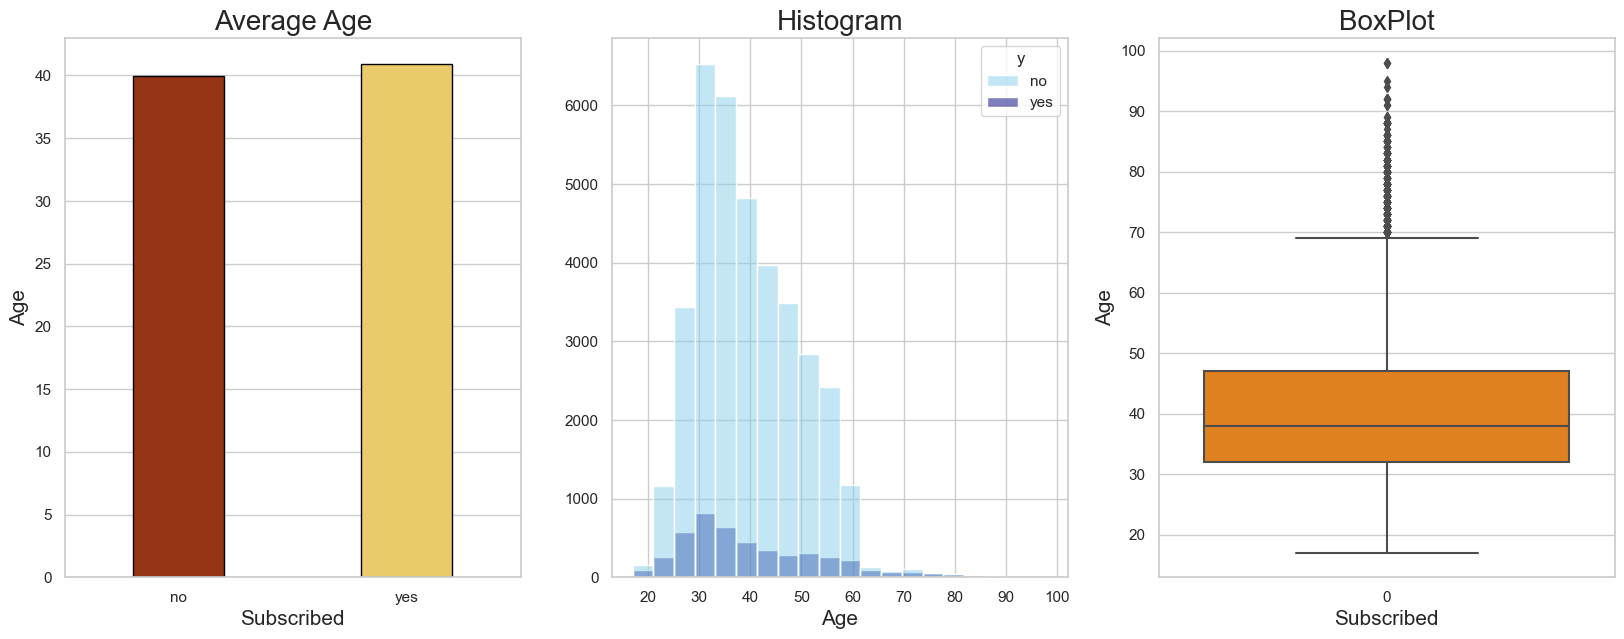

In [608]:
plt.figure(figsize = (20,7))

plt.subplot(1,3,1)
avg_age = df.groupby('y')['age'].mean().reset_index()
sns.barplot(x='y', y='age', data=avg_age, palette='afmhot', edgecolor='black', width=0.4 )
plt.title("Average Age", fontsize=20)
plt.xlabel("Subscribed", fontsize=15)
plt.ylabel("Age", fontsize=15)

plt.subplot(1,3,2)
sns.histplot(data=df, x='age', hue='y', palette=custom_colors, bins=20)
plt.title("Histogram", fontsize=20)
plt.xlabel("Age", fontsize=15)
plt.ylabel("", fontsize=15)

plt.subplot(1,3,3)
sns.boxplot(df['age'], palette='afmhot')
plt.title("BoxPlot", fontsize=20)
plt.xlabel("Subscribed", fontsize=15)
plt.ylabel("Age", fontsize=15)

plt.show()

* **Not much difference**

In [386]:
df['duration'].describe()

count    41188.000000
mean       258.285010
std        259.279249
min          0.000000
25%        102.000000
50%        180.000000
75%        319.000000
max       4918.000000
Name: duration, dtype: float64

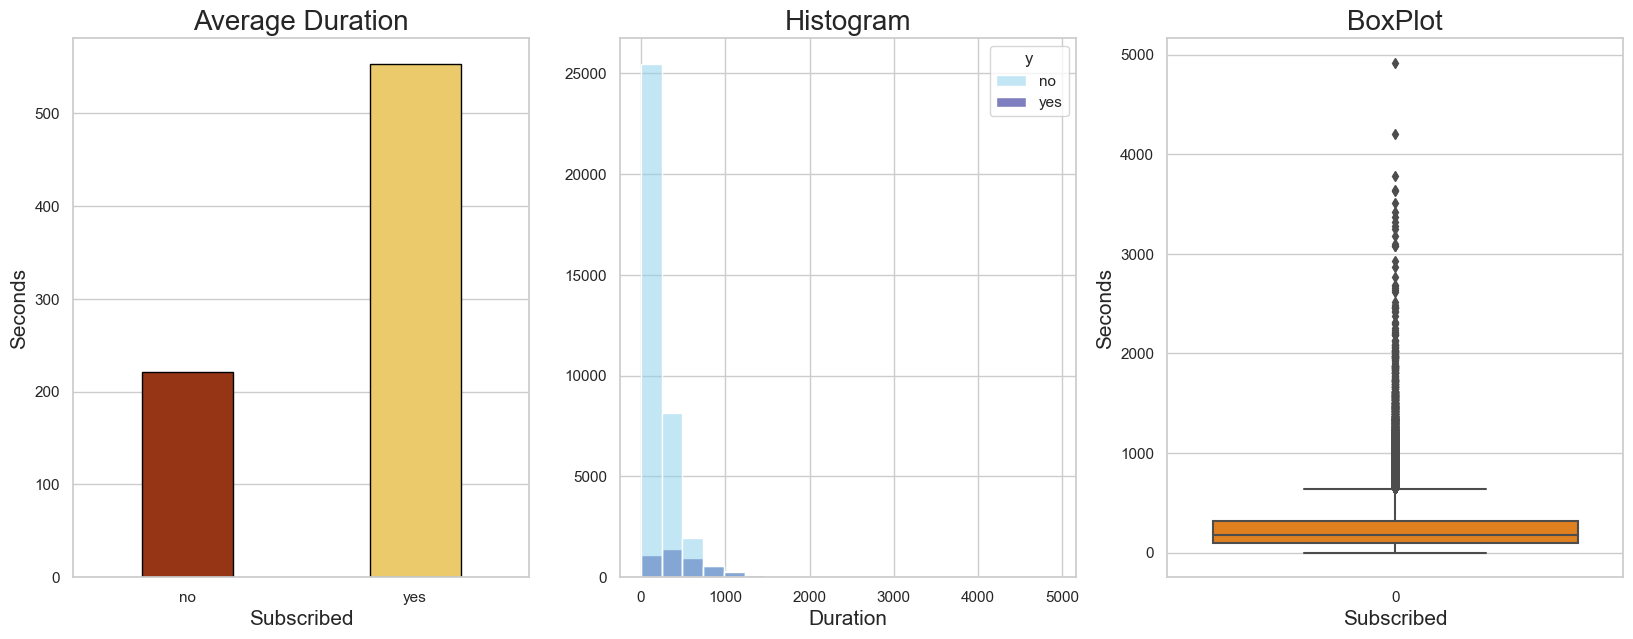

In [609]:
plt.figure(figsize = (20,7))

plt.subplot(1,3,1)
avg_duration = df.groupby('y')['duration'].mean().reset_index()
sns.barplot(x='y', y='duration', data=avg_duration, palette='afmhot', edgecolor='black', width=0.4 )
plt.title("Average Duration", fontsize=20)
plt.xlabel("Subscribed", fontsize=15)
plt.ylabel("Seconds", fontsize=15)

plt.subplot(1,3,2)
custom_colors = {"no": "skyblue", "yes": "navy"}
sns.histplot(data=df, x='duration', hue='y', palette=custom_colors, bins=20)
plt.title("Histogram", fontsize=20)
plt.xlabel("Duration", fontsize=15)
plt.ylabel("", fontsize=15)

plt.subplot(1,3,3)
sns.boxplot(df['duration'], palette='afmhot')
plt.title("BoxPlot", fontsize=20)
plt.xlabel("Subscribed", fontsize=15)
plt.ylabel("Seconds", fontsize=15)


plt.show()

In [385]:
df['campaign'].describe()

count    41188.000000
mean         2.567593
std          2.770014
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         56.000000
Name: campaign, dtype: float64

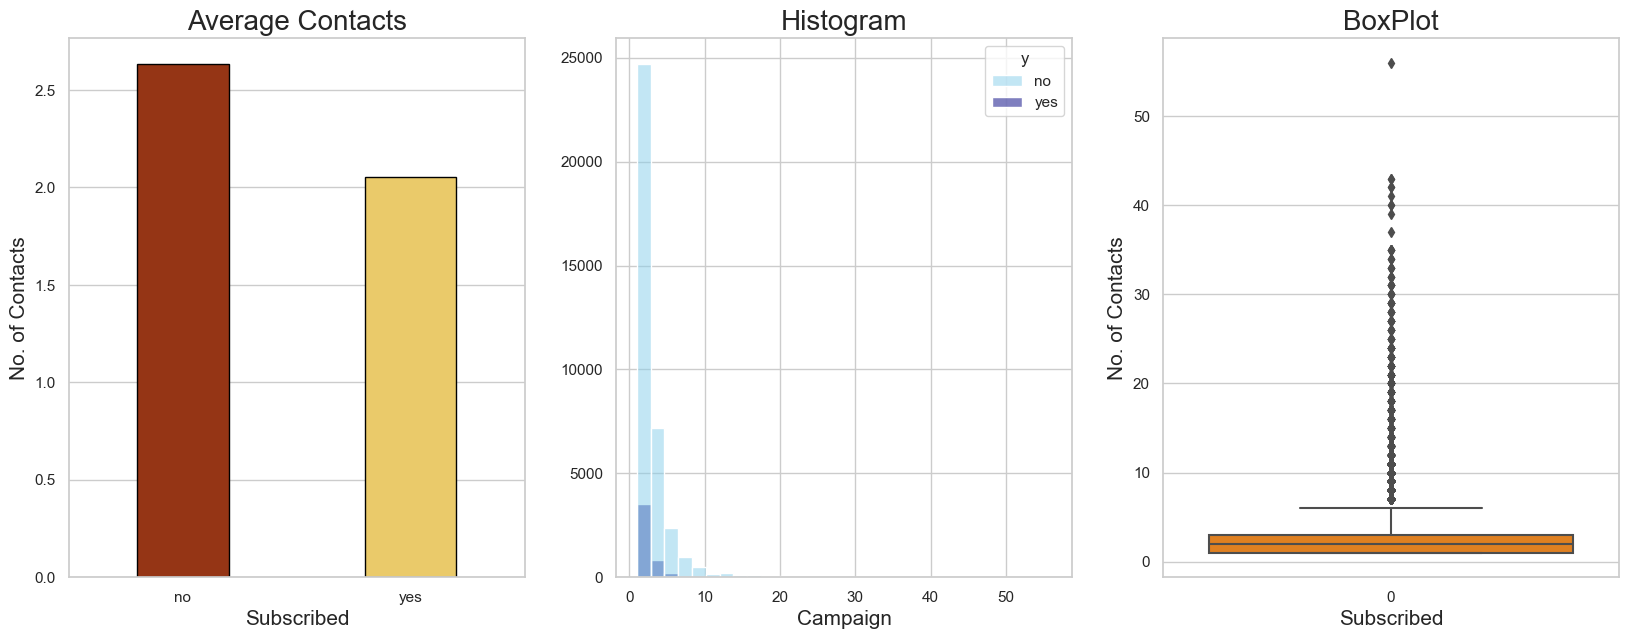

In [606]:
plt.figure(figsize = (20,7))

plt.subplot(1,3,1)
avg_campaign = df.groupby('y')['campaign'].mean().reset_index()
sns.barplot(x='y', y='campaign', data=avg_campaign, palette='afmhot', edgecolor='black', width=0.4 )
plt.title("Average Contacts", fontsize=20)
plt.xlabel("Subscribed", fontsize=15)
plt.ylabel("No. of Contacts", fontsize=15)

plt.subplot(1,3,2)
custom_colors = {"no": "skyblue", "yes": "navy"}
sns.histplot(data=df, x='campaign', hue='y', palette=custom_colors, bins=30)
plt.title("Histogram", fontsize=20)
plt.xlabel("Campaign", fontsize=15)
plt.ylabel("", fontsize=15)


plt.subplot(1,3,3)
sns.boxplot(df['campaign'], palette='afmhot')
plt.title("BoxPlot", fontsize=20)
plt.xlabel("Subscribed", fontsize=15)
plt.ylabel("No. of Contacts", fontsize=15)

plt.show()

* **It suggests that bank performed an extra call to users who doesn't subscribed.**
* **Generally an user subscribed to Term Deposit on average of 2 calls.**

In [492]:
df['euribor3m'].describe()

count    41188.000000
mean         3.621291
std          1.734447
min          0.634000
25%          1.344000
50%          4.857000
75%          4.961000
max          5.045000
Name: euribor3m, dtype: float64

**Euribor is an acronym for Euro Interbank Offered Rate, the official interest rate offered by banks in the professional interbank market. This means that it's the interest rate from one day to one year at which banks borrow funds from each other.**

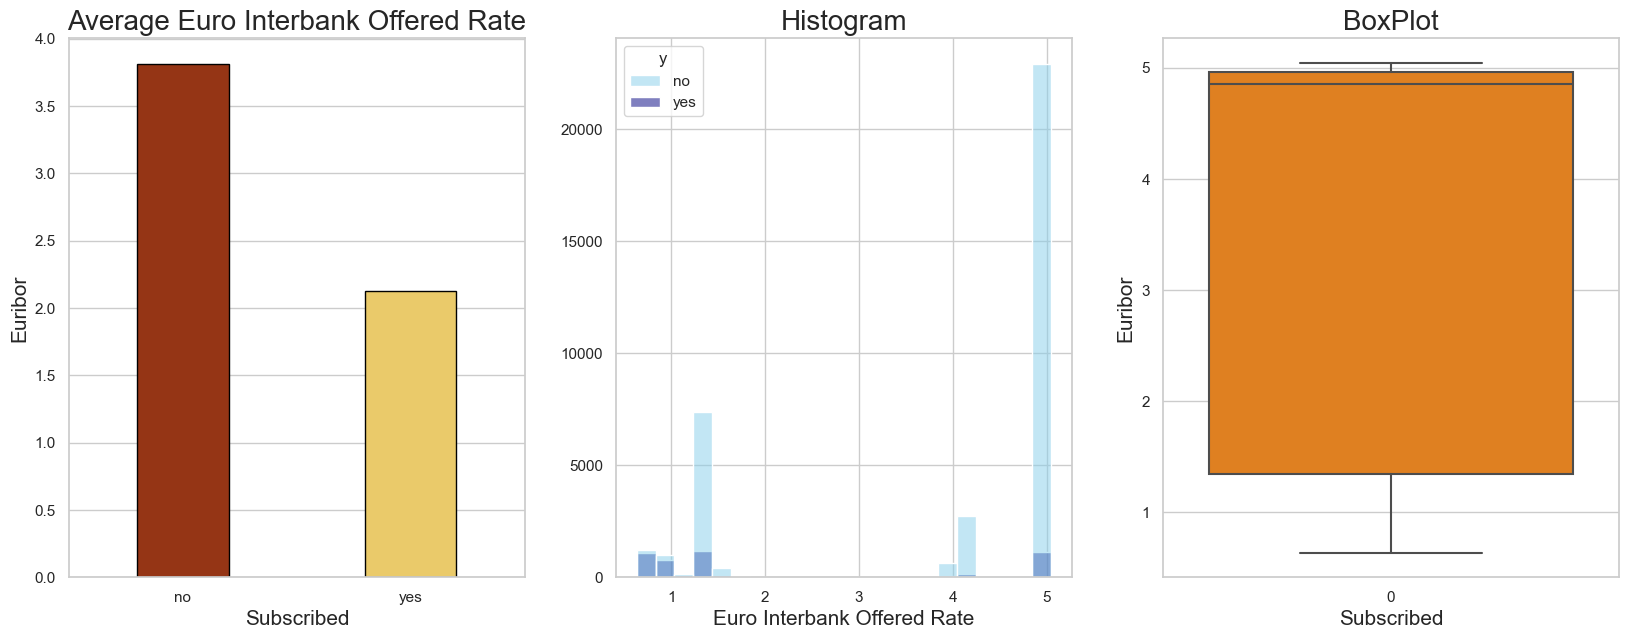

In [600]:
plt.figure(figsize = (20,7))

plt.subplot(1,3,1)
avg_age = df.groupby('y')['euribor3m'].mean().reset_index()
sns.barplot(x='y', y='euribor3m', data=avg_age, palette='afmhot', edgecolor='black', width=0.4 )
plt.title("Average Euro Interbank Offered Rate", fontsize=20)
plt.xlabel("Subscribed", fontsize=15)
plt.ylabel("Euribor", fontsize=15)

plt.subplot(1,3,2)
custom_colors = {"no": "skyblue", "yes": "navy"}
sns.histplot(data=df, x='euribor3m', hue='y', palette=custom_colors)
plt.title("Histogram", fontsize=20)
plt.xlabel("Euro Interbank Offered Rate", fontsize=15)
plt.ylabel("", fontsize=15)

plt.subplot(1,3,3)
sns.boxplot(df['euribor3m'], palette='afmhot')
plt.title("BoxPlot", fontsize=20)
plt.xlabel("Subscribed", fontsize=15)
plt.ylabel("Euribor", fontsize=15)

plt.show()

* **Chances of**

### Discrete Variables

In [611]:
temp = df[['pdays', 'y']]
temp['pdays'] = temp['pdays'].replace(999, np.nan)
temp.dropna(inplace=True)
temp['pdays'].describe()

count    1515.000000
mean        6.014521
std         3.824906
min         0.000000
25%         3.000000
50%         6.000000
75%         7.000000
max        27.000000
Name: pdays, dtype: float64

In [612]:
temp['y'].value_counts()

yes    967
no     548
Name: y, dtype: int64

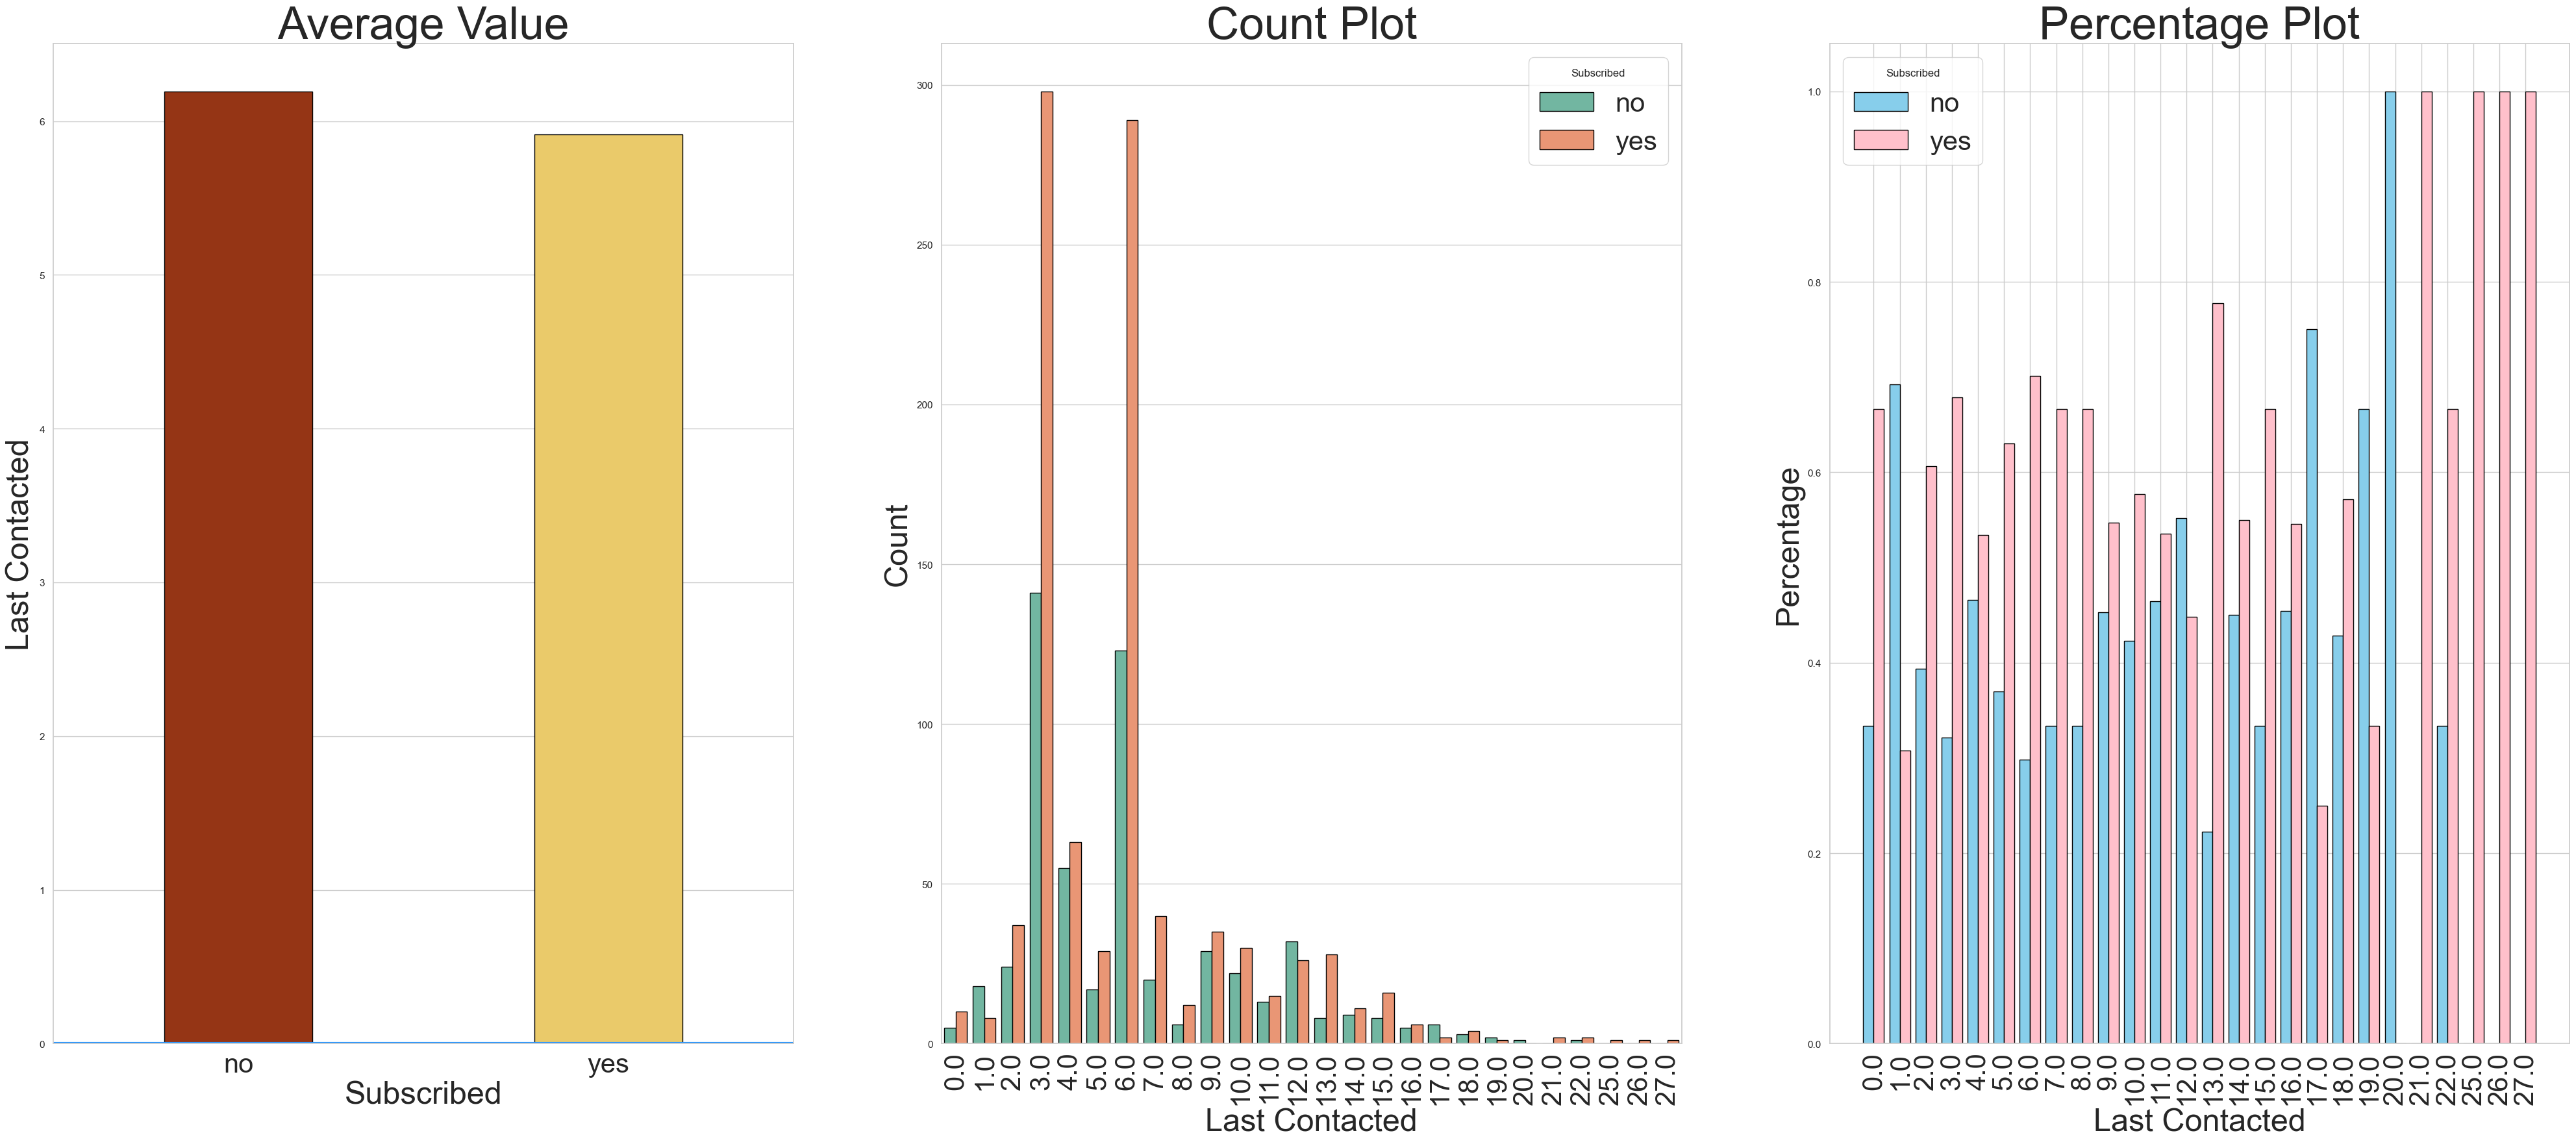

In [491]:
pdays_result = temp.groupby("pdays")["y"].value_counts(normalize=True).unstack().fillna(0)
pdays_labels = pdays_result.index
x = np.round(range(len(pdays_labels)), 0)
x_no = [i - 0.2 for i in x]  # Shift the "no" bars to the left
x_yes = [i + 0.2 for i in x] # Shift the "yes" bars to the right


plt.figure(figsize = (50,20))

plt.subplot(1,3,1)
avg_pdays = temp.groupby('y')['pdays'].mean().reset_index()
sns.barplot(x='y', y='pdays', data=avg_pdays, palette='afmhot', edgecolor='black', width=0.4 )
plt.axhline(y=0, color='dodgerblue', linestyle='-', linewidth=3, label='0 Line')
plt.title("Average Value", fontsize=50)
plt.xlabel("Subscribed", fontsize=35)
plt.ylabel("Last Contacted", fontsize=35)
plt.xticks(fontsize=30)


plt.subplot(1,3,2)
sns.countplot(data=temp, x='pdays', hue='y',palette='Set2', edgecolor='black')
plt.title("Count Plot",fontsize=50)
plt.xlabel("Last Contacted", fontsize=35)
plt.ylabel("Count", fontsize=35)
plt.xticks(fontsize=30, rotation=90)
plt.legend(title='Subscribed', fontsize=30, loc='upper right')

plt.subplot(1,3,3)
plt.bar(x_no, pdays_result['no'], color='skyblue', edgecolor='black', width=0.4, label="no")
plt.bar(x_yes, pdays_result['yes'], color='pink', edgecolor='black', width=0.4, label="yes")

plt.title("Percentage Plot", fontsize=50)
plt.xlabel("Last Contacted", fontsize=35)
plt.ylabel("Percentage", fontsize=35)
plt.xticks(x, pdays_labels, fontsize=30, rotation=90)
plt.legend(title='Subscribed', fontsize=30, loc='upper left')

plt.show()

In [622]:
df['cons.conf.idx'].describe()

count    41188.000000
mean       -40.502600
std          4.628198
min        -50.800000
25%        -42.700000
50%        -41.800000
75%        -36.400000
max        -26.900000
Name: cons.conf.idx, dtype: float64

* **Consumer Confidence Index is a Measures of how Optimistic or Pessimistic Consumers are regarding their Expected Financial Situation**

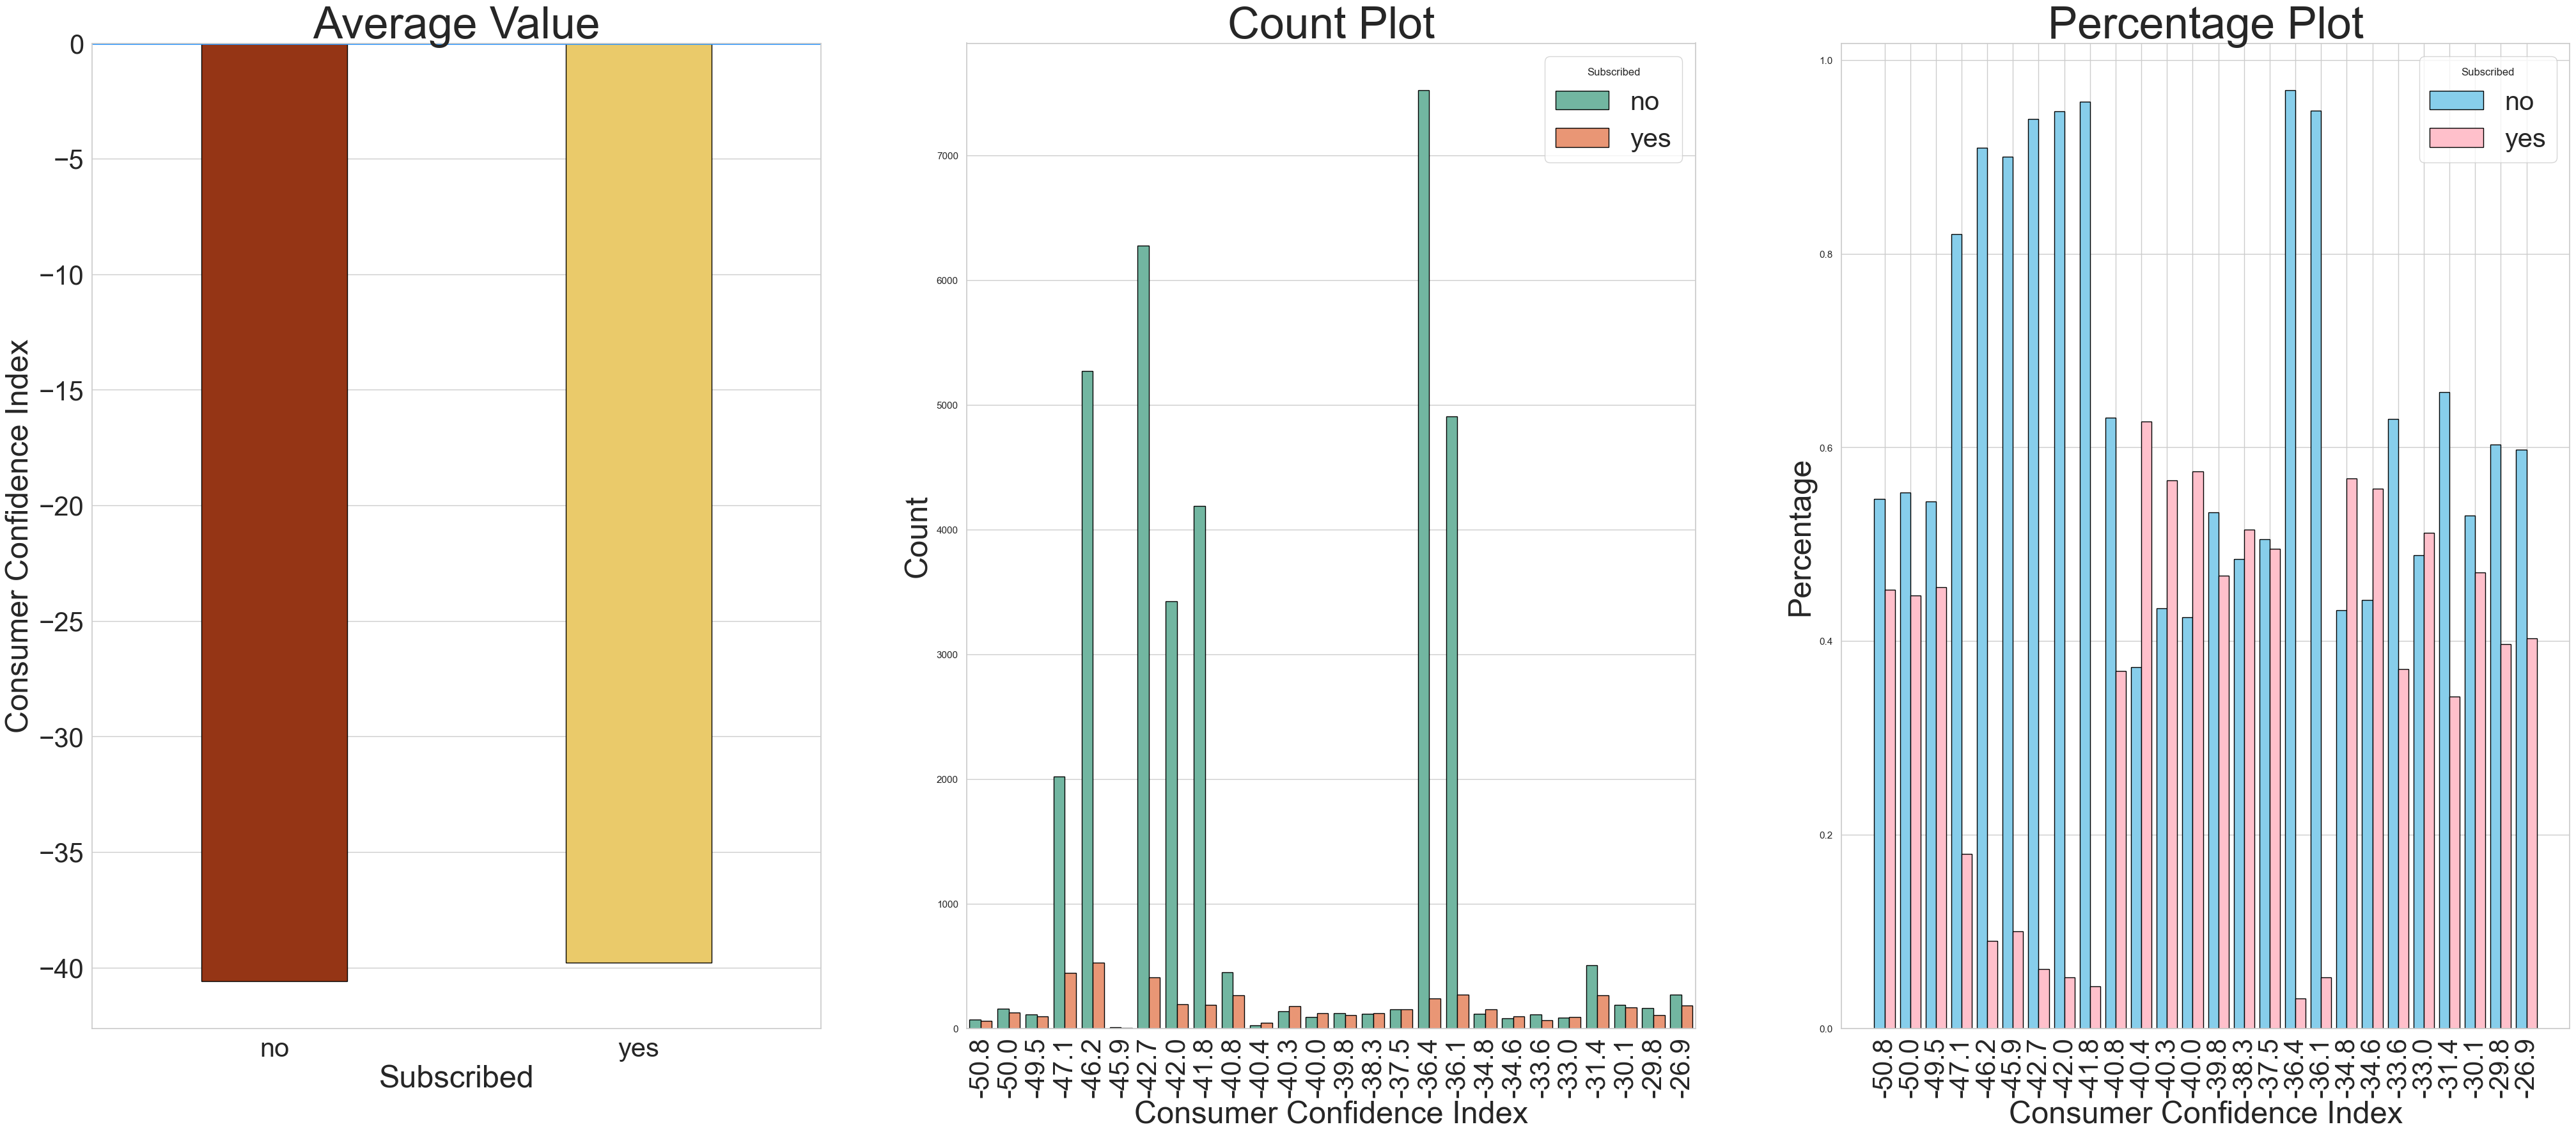

In [634]:
cci_result = df.groupby("cons.conf.idx")["y"].value_counts(normalize=True).unstack().fillna(0)
cci_labels = cci_result.index
x = range(len(cci_labels))
x_no = [i - 0.2 for i in x]  # Shift the "no" bars to the left
x_yes = [i + 0.2 for i in x] # Shift the "yes" bars to the right


plt.figure(figsize = (50,20))

plt.subplot(1,3,1)
avg_previous = df.groupby('y')['cons.conf.idx'].mean().reset_index()
sns.barplot(x='y', y='cons.conf.idx', data=avg_previous, palette='afmhot', edgecolor='black', width=0.4 )
plt.axhline(y=0, color='dodgerblue', linestyle='-', linewidth=3, label='0 Line')
plt.title("Average Value", fontsize=50)
plt.xlabel("Subscribed", fontsize=35)
plt.ylabel("Consumer Confidence Index", fontsize=35)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)

plt.subplot(1,3,2)
sns.countplot(data=df, x='cons.conf.idx', hue='y',palette='Set2', edgecolor='black')
plt.title("Count Plot",fontsize=50)
plt.xlabel("Consumer Confidence Index", fontsize=35)
plt.ylabel("Count", fontsize=35)
plt.xticks(fontsize=30, rotation=90)
plt.legend(title='Subscribed', fontsize=30, loc='upper right')

plt.subplot(1,3,3)
plt.bar(x_no, cci_result['no'], color='skyblue', edgecolor='black', width=0.4, label="no")
plt.bar(x_yes, cci_result['yes'], color='pink', edgecolor='black', width=0.4, label="yes")
plt.title("Percentage Plot", fontsize=50)
plt.xlabel("Consumer Confidence Index", fontsize=35)
plt.ylabel("Percentage", fontsize=35)
plt.xticks(x, cci_labels, fontsize=30, rotation=90)
plt.legend(title='Subscribed', fontsize=30, loc='upper right')

plt.show()

In [631]:
df['cons.price.idx'].describe()

count    41188.000000
mean        93.575664
std          0.578840
min         92.201000
25%         93.075000
50%         93.749000
75%         93.994000
max         94.767000
Name: cons.price.idx, dtype: float64

**Consumer Price Index measures the Percentage Change in the Price of a basket of goods and services consumed by Households.**
* **Measure of Inflamation or Deflation**

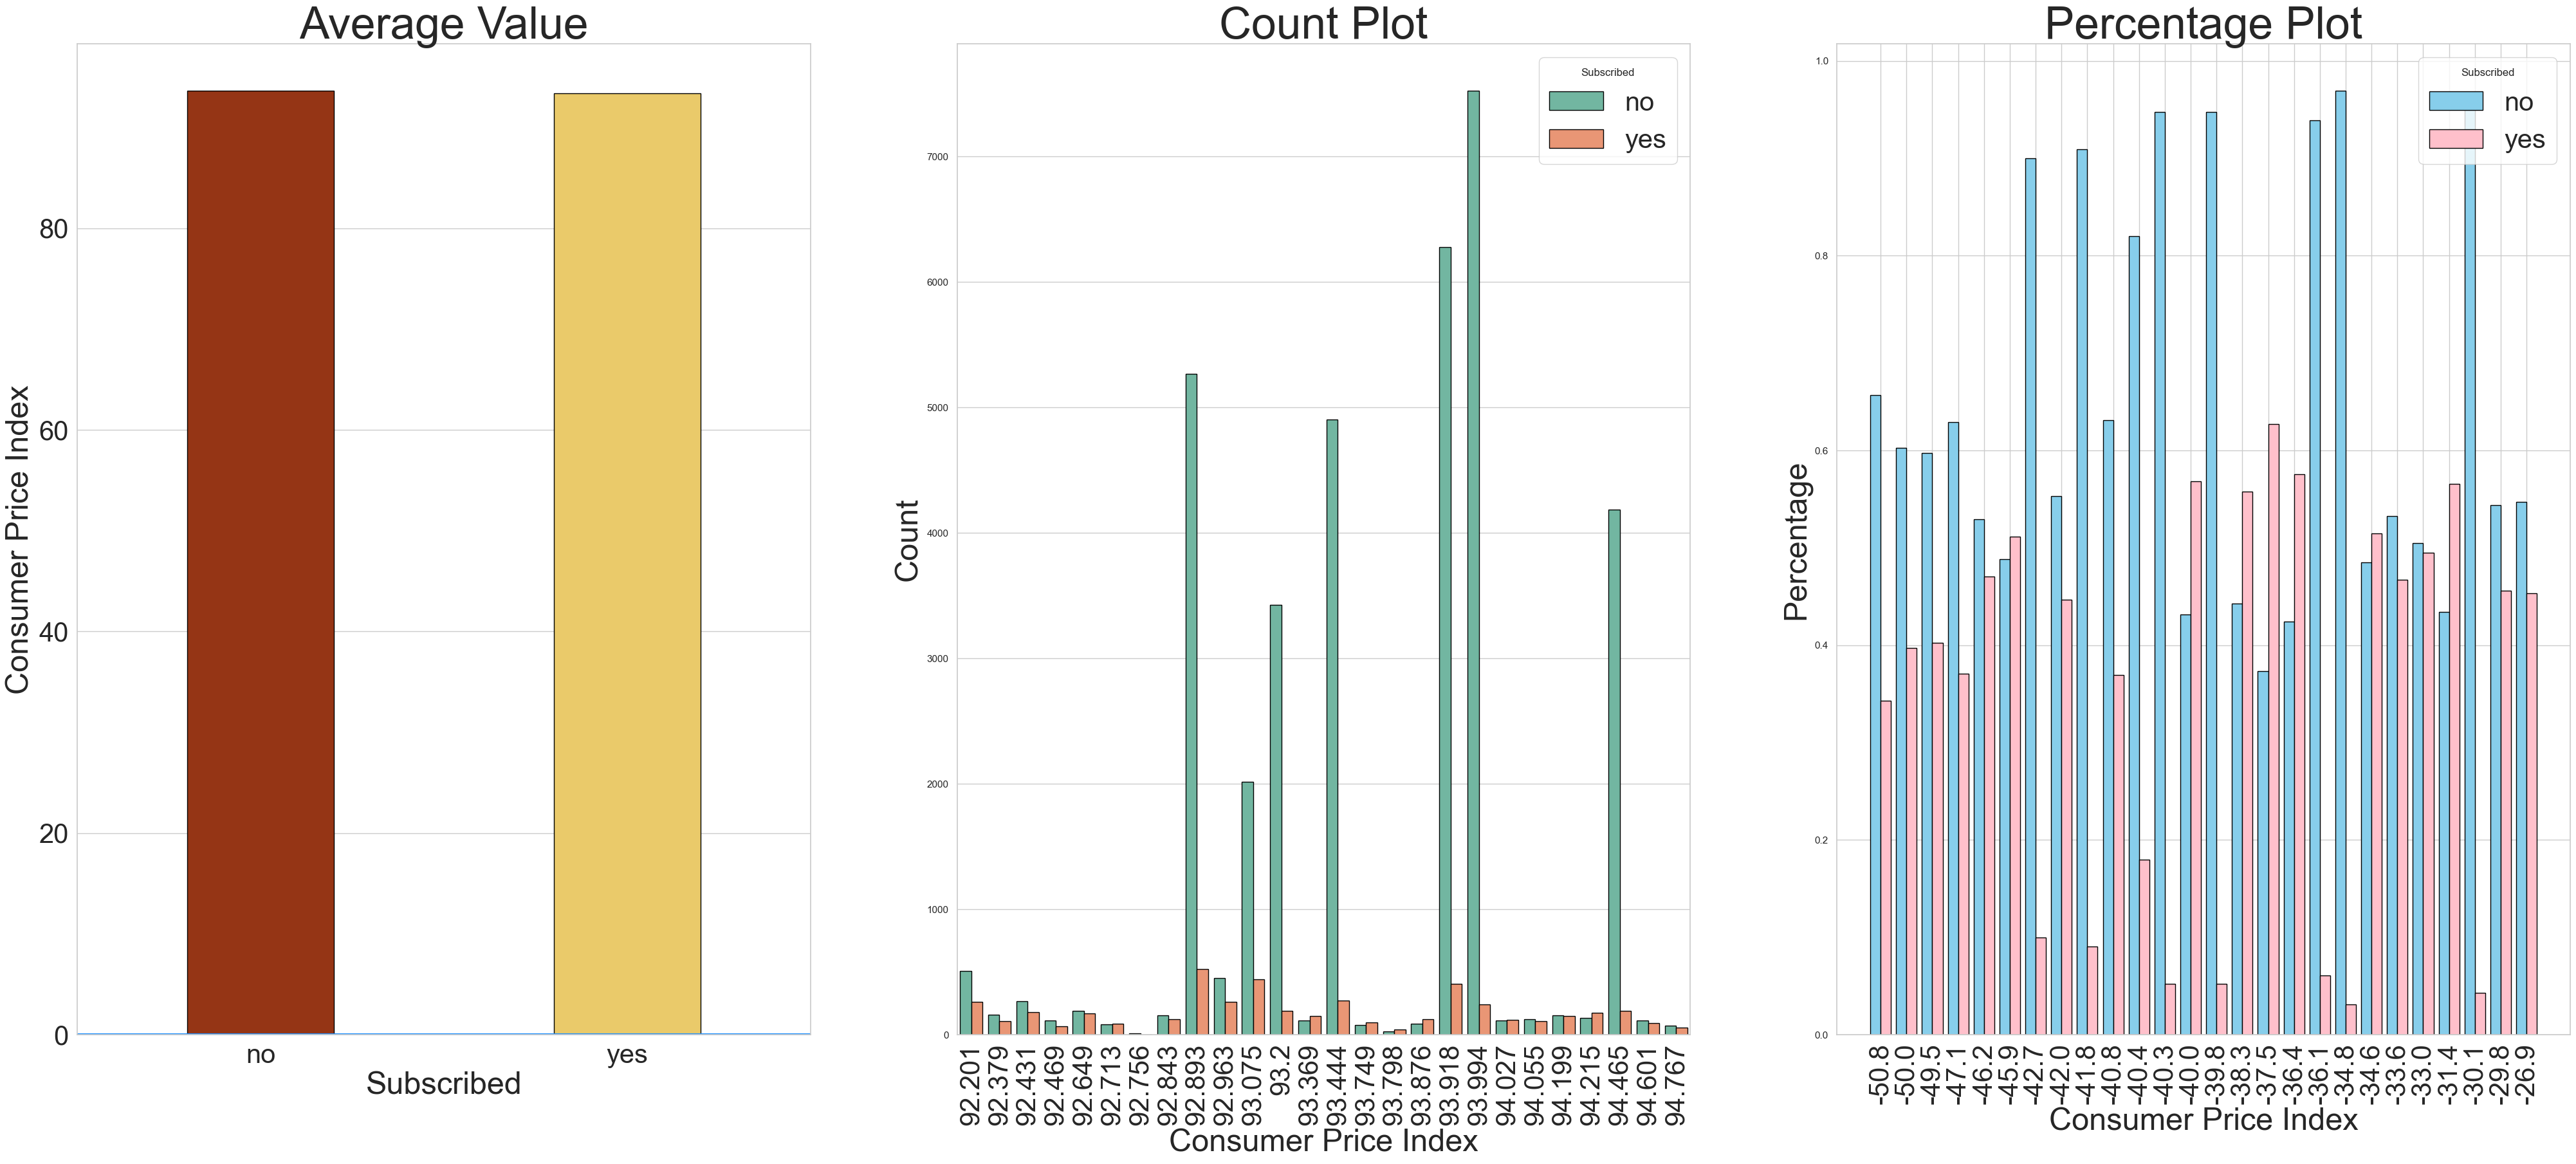

In [633]:
cpi_result = df.groupby("cons.price.idx")["y"].value_counts(normalize=True).unstack().fillna(0)
cpi_labels = cpi_result.index
x = range(len(cpi_labels))
x_no = [i - 0.2 for i in x]  # Shift the "no" bars to the left
x_yes = [i + 0.2 for i in x] # Shift the "yes" bars to the right


plt.figure(figsize = (50,20))

plt.subplot(1,3,1)
avg_previous = df.groupby('y')['cons.price.idx'].mean().reset_index()
sns.barplot(x='y', y='cons.price.idx', data=avg_previous, palette='afmhot', edgecolor='black', width=0.4 )
plt.axhline(y=0, color='dodgerblue', linestyle='-', linewidth=3, label='0 Line')
plt.title("Average Value", fontsize=50)
plt.xlabel("Subscribed", fontsize=35)
plt.ylabel("Consumer Price Index", fontsize=35)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)

plt.subplot(1,3,2)
sns.countplot(data=df, x='cons.price.idx', hue='y',palette='Set2', edgecolor='black')
plt.title("Count Plot",fontsize=50)
plt.xlabel("Consumer Price Index", fontsize=35)
plt.ylabel("Count", fontsize=35)
plt.xticks(fontsize=30, rotation=90)
plt.legend(title='Subscribed', fontsize=30, loc='upper right')

plt.subplot(1,3,3)
plt.bar(x_no, cpi_result['no'], color='skyblue', edgecolor='black', width=0.4, label="no")
plt.bar(x_yes, cpi_result['yes'], color='pink', edgecolor='black', width=0.4, label="yes")
plt.title("Percentage Plot", fontsize=50)
plt.xlabel("Consumer Price Index", fontsize=35)
plt.ylabel("Percentage", fontsize=35)
plt.xticks(x, cci_labels, fontsize=30, rotation=90)
plt.legend(title='Subscribed', fontsize=30, loc='upper right')

plt.show()

In [383]:
df['previous'].describe()

count    41188.000000
mean         0.172963
std          0.494901
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          7.000000
Name: previous, dtype: float64

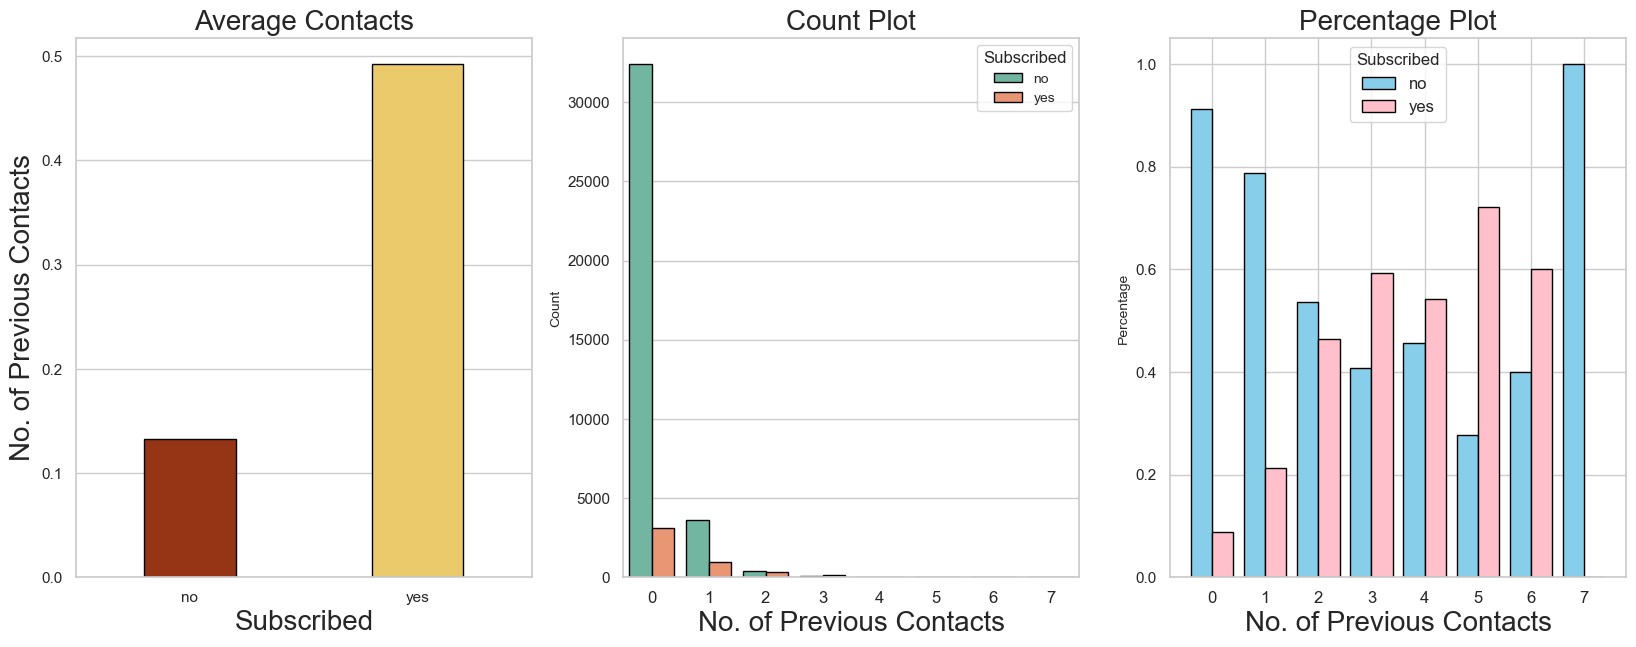

In [620]:
previous_result = df.groupby("previous")["y"].value_counts(normalize=True).unstack().fillna(0)
previous_labels = previous_result.index
x = range(len(previous_labels))
x_no = [i - 0.2 for i in x]  # Shift the "no" bars to the left
x_yes = [i + 0.2 for i in x] # Shift the "yes" bars to the right


plt.figure(figsize = (20,7))

plt.subplot(1,3,1)
avg_previous = df.groupby('y')['previous'].mean().reset_index()
sns.barplot(x='y', y='previous', data=avg_previous, palette='afmhot', edgecolor='black', width=0.4 )
plt.title("Average Contacts", fontsize=20)
plt.xlabel("Subscribed", fontsize=20)
plt.ylabel("No. of Previous Contacts", fontsize=20)

plt.subplot(1,3,2)
sns.countplot(data=df, x='previous', hue='y',palette='Set2', edgecolor='black')
plt.title("Count Plot",fontsize=20)
plt.xlabel("No. of Previous Contacts", fontsize=20)
plt.ylabel("Count", fontsize=10)
plt.xticks(fontsize=12)
plt.legend(title='Subscribed', fontsize=10, loc='upper right')

plt.subplot(1,3,3)
plt.bar(x_no, previous_result['no'], color='skyblue', edgecolor='black', width=0.4, label="no")
plt.bar(x_yes, previous_result['yes'], color='pink', edgecolor='black', width=0.4, label="yes")

plt.title("Percentage Plot", fontsize=20)
plt.xlabel("No. of Previous Contacts", fontsize=20)
plt.ylabel("Percentage", fontsize=10)
plt.xticks(x, previous_labels, fontsize=12)
plt.legend(title='Subscribed', fontsize=12, loc='upper center')

plt.show()

In [429]:
df['emp.var.rate'].describe()

count    41188.000000
mean         0.081886
std          1.570960
min         -3.400000
25%         -1.800000
50%          1.100000
75%          1.400000
max          1.400000
Name: emp.var.rate, dtype: float64

In [432]:
df['emp.var.rate'].value_counts()

 1.4    16234
-1.8     9184
 1.1     7763
-0.1     3683
-2.9     1663
-3.4     1071
-1.7      773
-1.1      635
-3.0      172
-0.2       10
Name: emp.var.rate, dtype: int64

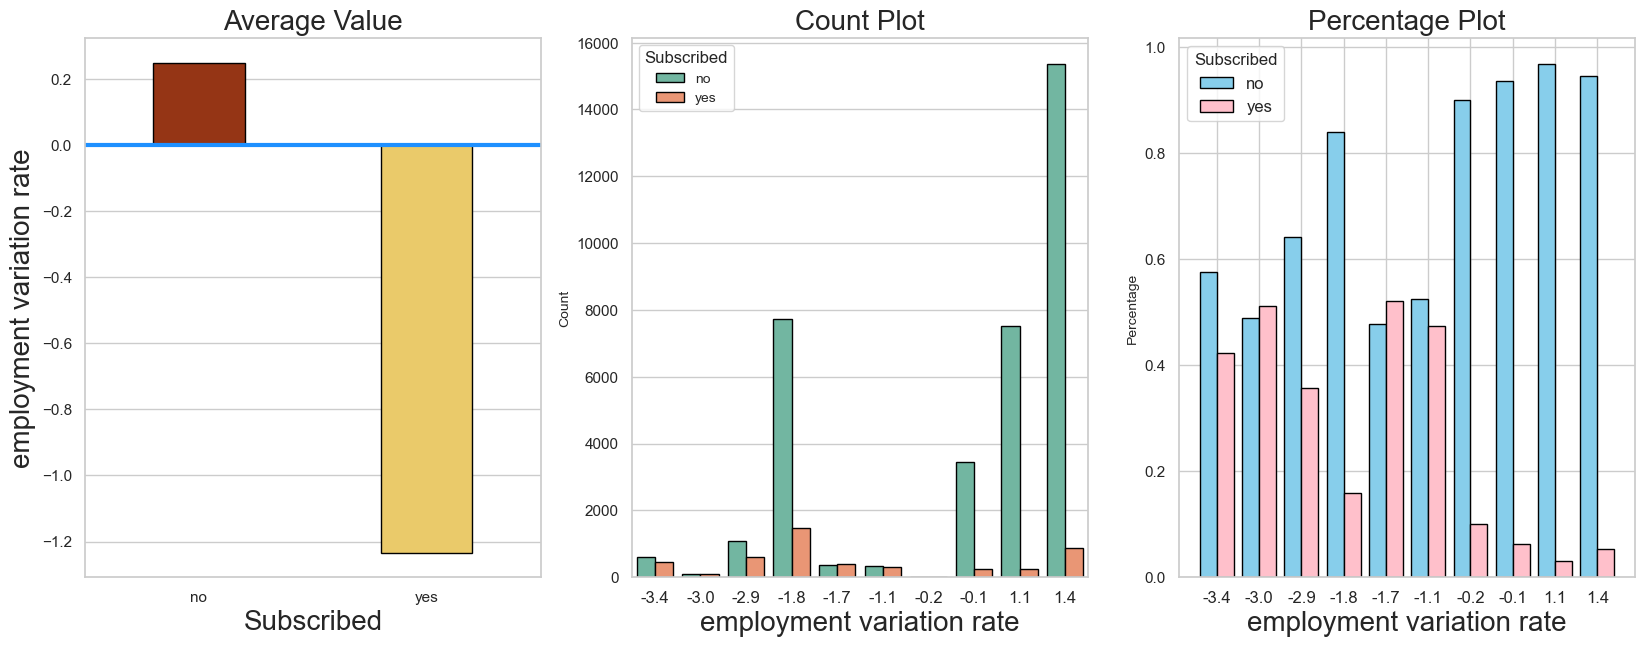

In [621]:
EmpVar_result = df.groupby("emp.var.rate")["y"].value_counts(normalize=True).unstack().fillna(0)
EmpVar_labels = EmpVar_result.index
x = range(len(EmpVar_labels))
x_no = [i - 0.2 for i in x]  # Shift the "no" bars to the left
x_yes = [i + 0.2 for i in x] # Shift the "yes" bars to the right


plt.figure(figsize = (20,7))

plt.subplot(1,3,1)
avg_EmpVar = df.groupby('y')['emp.var.rate'].mean().reset_index()
sns.barplot(x='y', y='emp.var.rate', data=avg_EmpVar, palette='afmhot', edgecolor='black', width=0.4 )
plt.axhline(y=0, color='dodgerblue', linestyle='-', linewidth=3, label='0 Line')
plt.title("Average Value", fontsize=20)
plt.xlabel("Subscribed", fontsize=20)
plt.ylabel("employment variation rate", fontsize=20)

plt.subplot(1,3,2)
sns.countplot(data=df, x='emp.var.rate', hue='y',palette='Set2', edgecolor='black')
plt.title("Count Plot",fontsize=20)
plt.xlabel("employment variation rate", fontsize=20)
plt.ylabel("Count", fontsize=10)
plt.xticks(fontsize=12)
plt.legend(title='Subscribed', fontsize=10, loc='upper left')

plt.subplot(1,3,3)
plt.bar(x_no, EmpVar_result['no'], color='skyblue', edgecolor='black', width=0.4, label="no")
plt.bar(x_yes, EmpVar_result['yes'], color='pink', edgecolor='black', width=0.4, label="yes")

plt.title("Percentage Plot", fontsize=20)
plt.xlabel("employment variation rate", fontsize=20)
plt.ylabel("Percentage", fontsize=10)
plt.xticks(x, EmpVar_labels, fontsize=12)
plt.legend(title='Subscribed', fontsize=12, loc='upper left')

plt.show()

* **Average employment variation rate has a clear difference. Probability of Term Deposit is lower when employment variation rate is Possitive.**
* **Majority values are negative**

In [636]:
df['nr.employed'].describe()

count    41188.000000
mean      5167.035911
std         72.251528
min       4963.600000
25%       5099.100000
50%       5191.000000
75%       5228.100000
max       5228.100000
Name: nr.employed, dtype: float64

**Number of Employees represents the number of people engaged at the place of business each regular working day during the preceding calendar year**

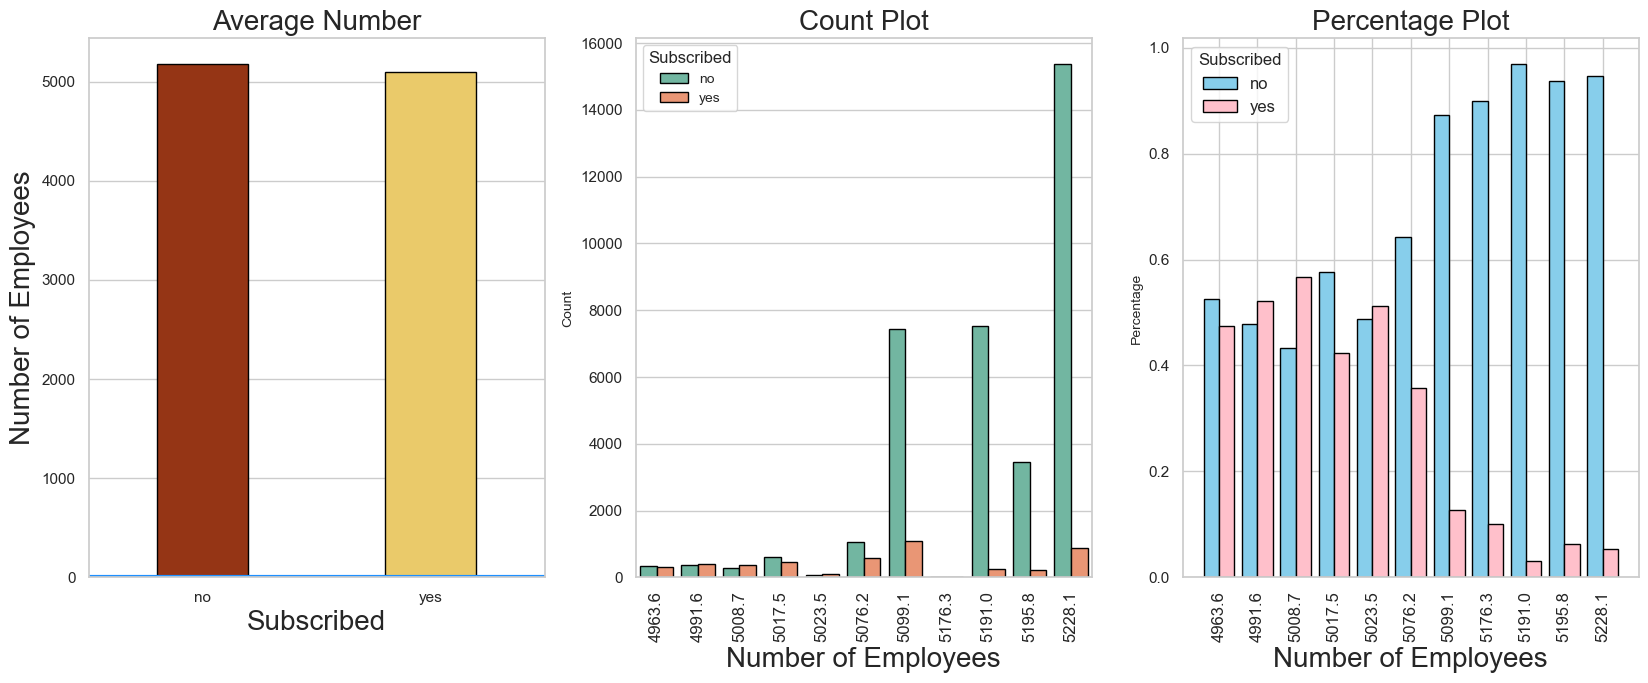

In [643]:
nemp_result = df.groupby("nr.employed")["y"].value_counts(normalize=True).unstack().fillna(0)
nemp_labels = nemp_result.index
x = range(len(nemp_labels))
x_no = [i - 0.2 for i in x]  # Shift the "no" bars to the left
x_yes = [i + 0.2 for i in x] # Shift the "yes" bars to the right


plt.figure(figsize = (20,7))

plt.subplot(1,3,1)
avg_nemp = df.groupby('y')['nr.employed'].mean().reset_index()
sns.barplot(x='y', y='nr.employed', data=avg_nemp, palette='afmhot', edgecolor='black', width=0.4 )
plt.axhline(y=0, color='dodgerblue', linestyle='-', linewidth=3, label='0 Line')
plt.title("Average Number", fontsize=20)
plt.xlabel("Subscribed", fontsize=20)
plt.ylabel("Number of Employees", fontsize=20)

plt.subplot(1,3,2)
sns.countplot(data=df, x='nr.employed', hue='y',palette='Set2', edgecolor='black')
plt.title("Count Plot",fontsize=20)
plt.xlabel("Number of Employees", fontsize=20)
plt.ylabel("Count", fontsize=10)
plt.xticks(fontsize=12, rotation=90)
plt.legend(title='Subscribed', fontsize=10, loc='upper left')

plt.subplot(1,3,3)
plt.bar(x_no, nemp_result['no'], color='skyblue', edgecolor='black', width=0.4, label="no")
plt.bar(x_yes, nemp_result['yes'], color='pink', edgecolor='black', width=0.4, label="yes")

plt.title("Percentage Plot", fontsize=20)
plt.xlabel("Number of Employees", fontsize=20)
plt.ylabel("Percentage", fontsize=10)
plt.xticks(x, nemp_labels, fontsize=12, rotation=90)
plt.legend(title='Subscribed', fontsize=12, loc='upper left')

plt.show()

* 

## Bivariate Analysis

In [335]:
temp = df[num_cols]
temp['y'] = df['y']
temp.head()

age  duration  campaign  pdays  previous  emp.var.rate  cons.price.idx  \
0   56       261         1    999         0           1.1          93.994   
1   57       149         1    999         0           1.1          93.994   
2   37       226         1    999         0           1.1          93.994   
3   40       151         1    999         0           1.1          93.994   
4   56       307         1    999         0           1.1          93.994   

   cons.conf.idx  euribor3m  nr.employed   y  
0          -36.4      4.857       5191.0  no  
1          -36.4      4.857       5191.0  no  
2          -36.4      4.857       5191.0  no  
3          -36.4      4.857       5191.0  no  
4          -36.4      4.857       5191.0  no

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 3000x3000 with 0 Axes>

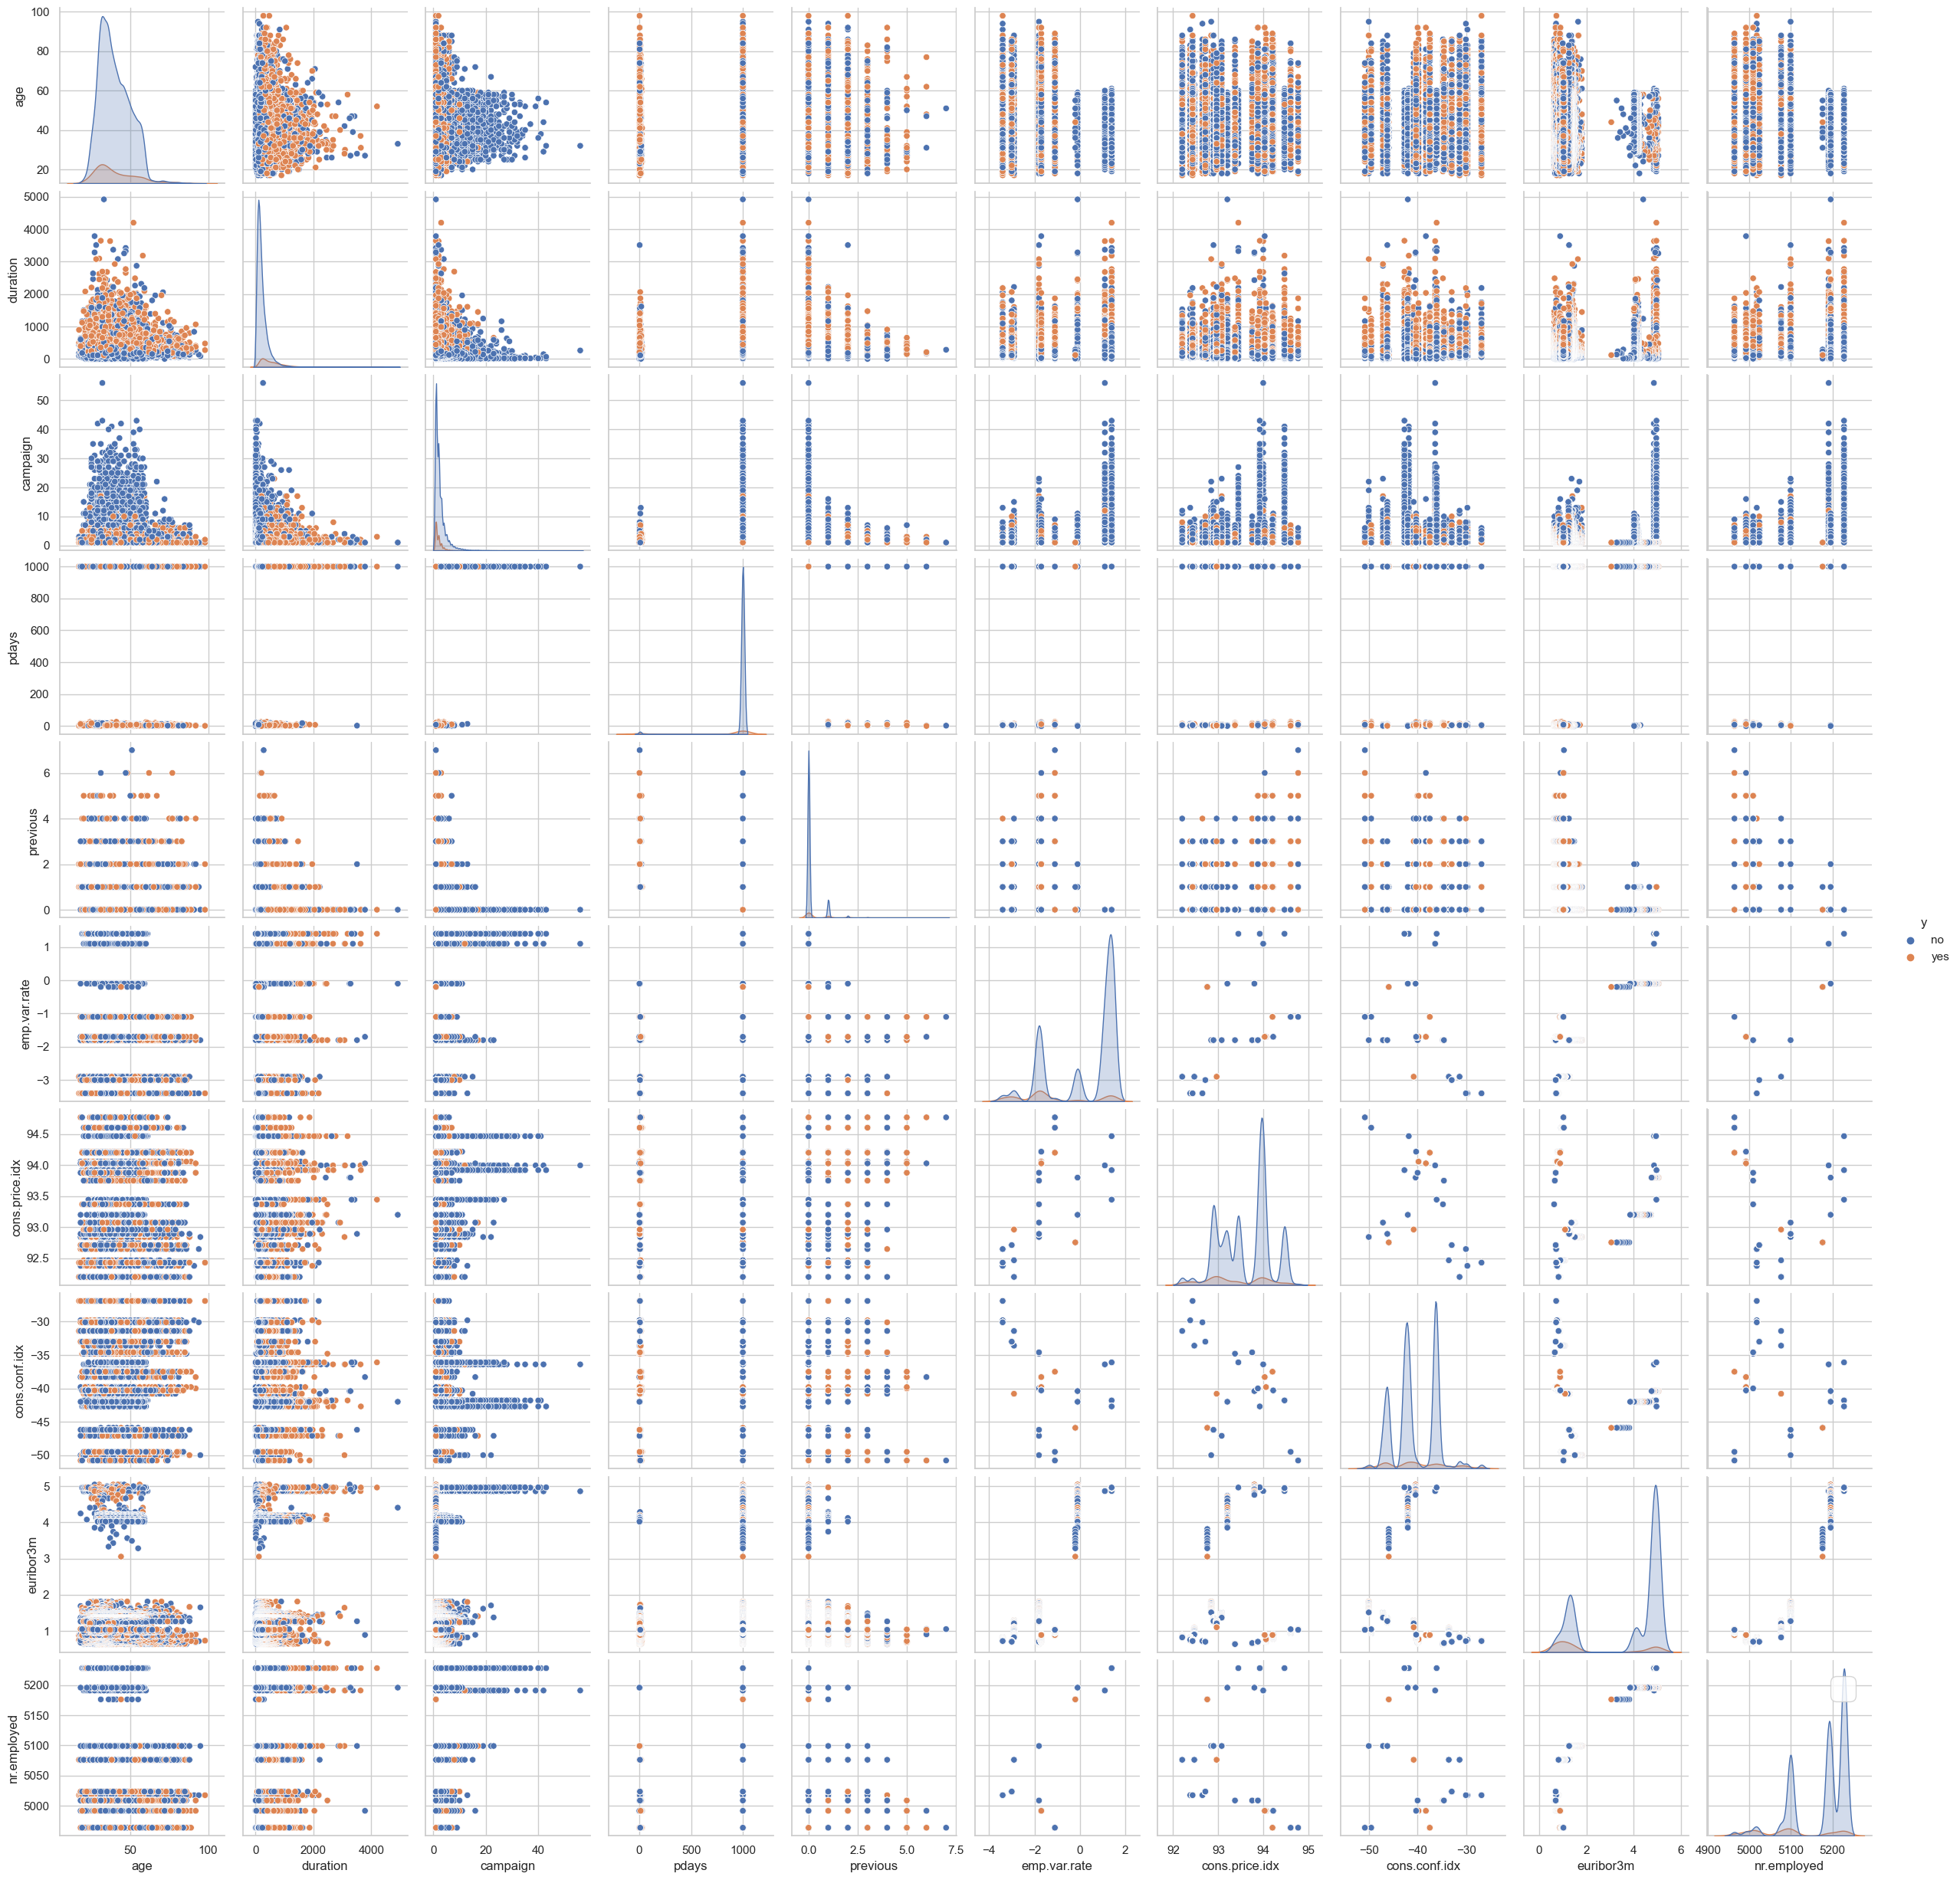

In [345]:
plt.figure(figsize = (30,30))
sns.pairplot(data=temp, hue='y')
plt.legend(loc='upper right', fontsize=30)

### Categorical Features

In [187]:
cat_cols = list(df.select_dtypes(include=['object']))
df[cat_cols].nunique()

job            12
marital         4
education       8
default         3
housing         3
loan            3
contact         2
month          10
day_of_week     5
poutcome        3
y               2
dtype: int64

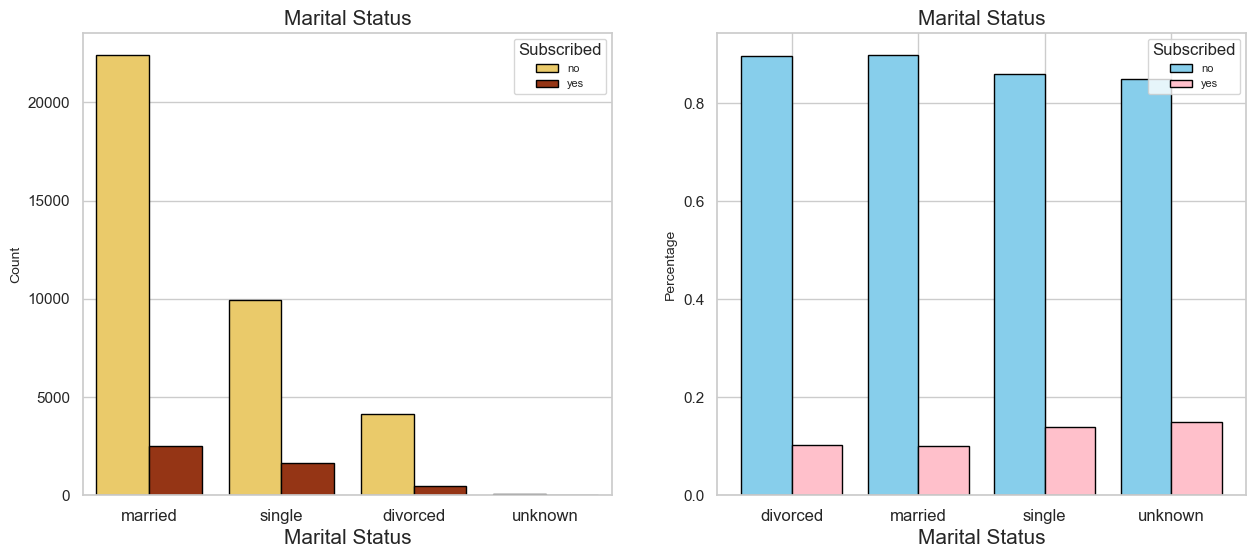

In [297]:
marital_result = df.groupby("marital")["y"].value_counts(normalize=True).unstack()
marital_labels = marital_result.index
x = range(len(marital_labels))
x_no = [i - 0.2 for i in x]  # Shift the "no" bars to the left
x_yes = [i + 0.2 for i in x] # Shift the "yes" bars to the right


plt.figure(figsize=(15, 6))


plt.subplot(1,2,1)
sns.countplot(data=df, x='marital', hue='y',palette='afmhot_r', edgecolor='black')
plt.title("Marital Status",fontsize=15)
plt.xlabel("Marital Status", fontsize=15)
plt.ylabel("Count", fontsize=10)
plt.xticks(fontsize=12)
plt.legend(title='Subscribed', fontsize=8, loc='upper right')


plt.subplot(1,2,2)
plt.bar(x_no, marital_result['no'], color='skyblue', edgecolor='black', width=0.4, label="no")
plt.bar(x_yes, marital_result['yes'], color='pink', edgecolor='black', width=0.4, label="yes")

plt.title("Marital Status", fontsize=15)
plt.xlabel("Marital Status", fontsize=15)
plt.ylabel("Percentage", fontsize=10)
plt.xticks(x, marital_labels, fontsize=12)
plt.legend(title='Subscribed', fontsize=8, loc='upper right')



plt.show()

* **Majority of the customers are Married**
* **It is almost evenly distributed for each category**

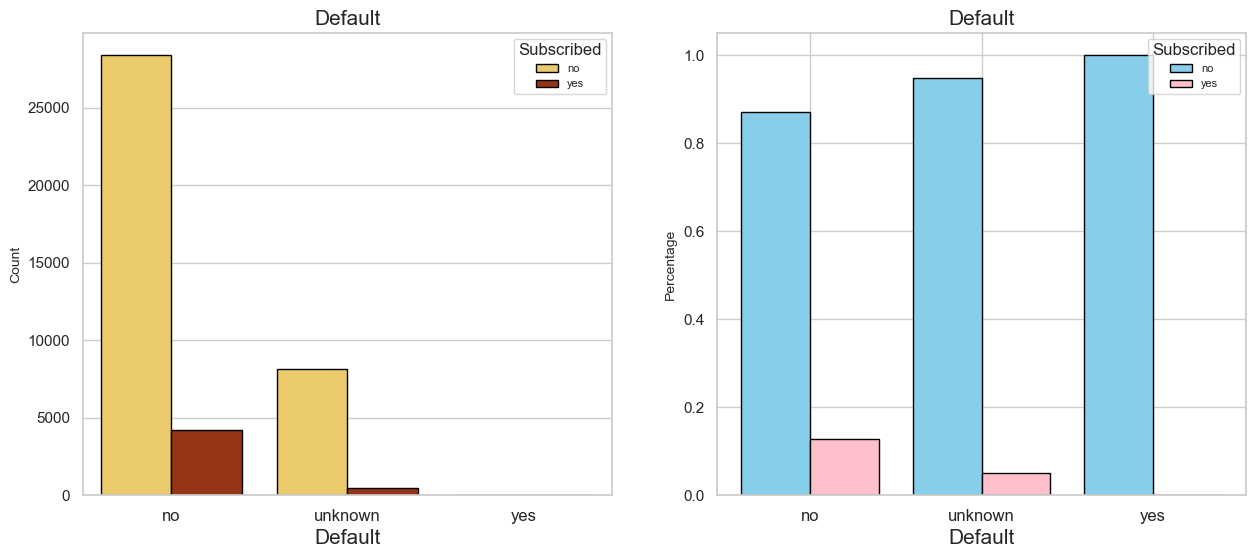

In [296]:
default_result = df.groupby("default")["y"].value_counts(normalize=True).unstack().fillna(0)
default_labels = default_result.index
x = range(len(default_labels))
x_no = [i - 0.2 for i in x]  # Shift the "no" bars to the left
x_yes = [i + 0.2 for i in x] # Shift the "yes" bars to the right


plt.figure(figsize=(15, 6))


plt.subplot(1,2,1)
sns.countplot(data=df, x='default', hue='y',palette='afmhot_r', edgecolor='black')
plt.title("Default",fontsize=15)
plt.xlabel("Default", fontsize=15)
plt.ylabel("Count", fontsize=10)
plt.xticks(fontsize=12)
plt.legend(title='Subscribed', fontsize=8, loc='upper right')


plt.subplot(1,2,2)
plt.bar(x_no, default_result['no'], color='skyblue', edgecolor='black', width=0.4, label="no")
plt.bar(x_yes, default_result['yes'], color='pink', edgecolor='black', width=0.4, label="yes")

plt.title("Default", fontsize=15)
plt.xlabel("Default", fontsize=15)
plt.ylabel("Percentage", fontsize=10)
plt.xticks(x, default_labels, fontsize=12)
plt.legend(title='Subscribed', fontsize=8, loc='upper right')



plt.show()

* **Can't get much info, as there is negligible defaulters**

In [256]:
df['housing'].value_counts()

yes        21576
no         18622
unknown      990
Name: housing, dtype: int64

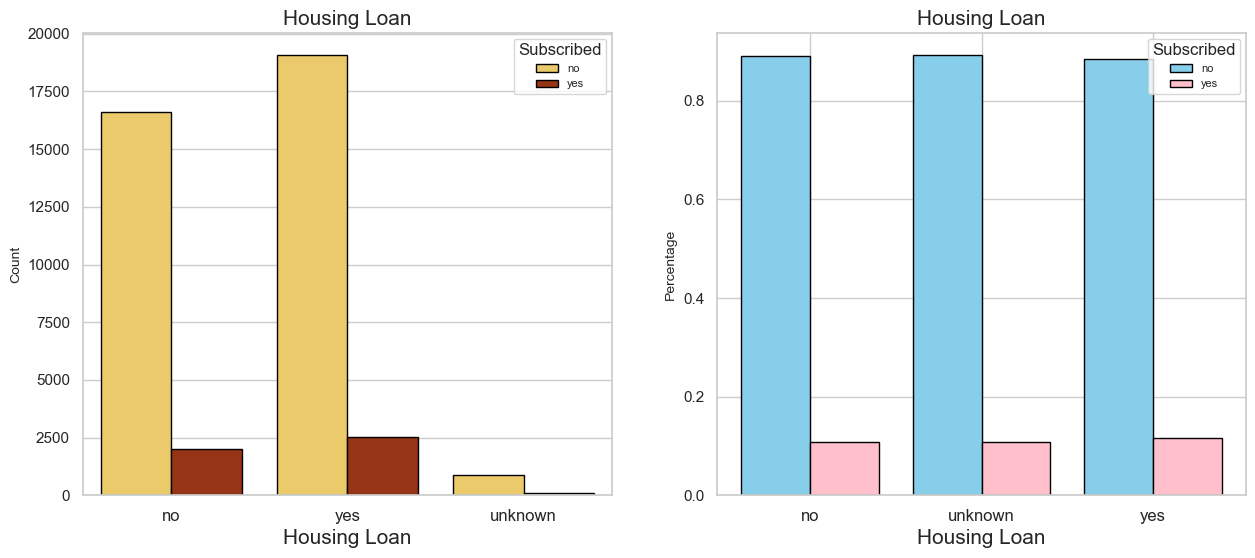

In [295]:
housing_result = df.groupby("housing")["y"].value_counts(normalize=True).unstack().fillna(0)
housing_labels = housing_result.index
x = range(len(housing_labels))
x_no = [i - 0.2 for i in x]  # Shift the "no" bars to the left
x_yes = [i + 0.2 for i in x] # Shift the "yes" bars to the right


plt.figure(figsize=(15, 6))


plt.subplot(1,2,1)
sns.countplot(data=df, x='housing', hue='y',palette='afmhot_r', edgecolor='black')
plt.title("Housing Loan",fontsize=15)
plt.xlabel("Housing Loan", fontsize=15)
plt.ylabel("Count", fontsize=10)
plt.xticks(fontsize=12)
plt.legend(title='Subscribed', fontsize=8, loc='upper right')


plt.subplot(1,2,2)
plt.bar(x_no, housing_result['no'], color='skyblue', edgecolor='black', width=0.4, label="no")
plt.bar(x_yes, housing_result['yes'], color='pink', edgecolor='black', width=0.4, label="yes")

plt.title("Housing Loan", fontsize=15)
plt.xlabel("Housing Loan", fontsize=15)
plt.ylabel("Percentage", fontsize=10)
plt.xticks(x, default_labels, fontsize=12)
plt.legend(title='Subscribed', fontsize=8, loc='upper right')



plt.show()

* **Can't comment on basis of housing Loan. Evenly distributed**

In [261]:
df['loan'].value_counts()

no         33950
yes         6248
unknown      990
Name: loan, dtype: int64

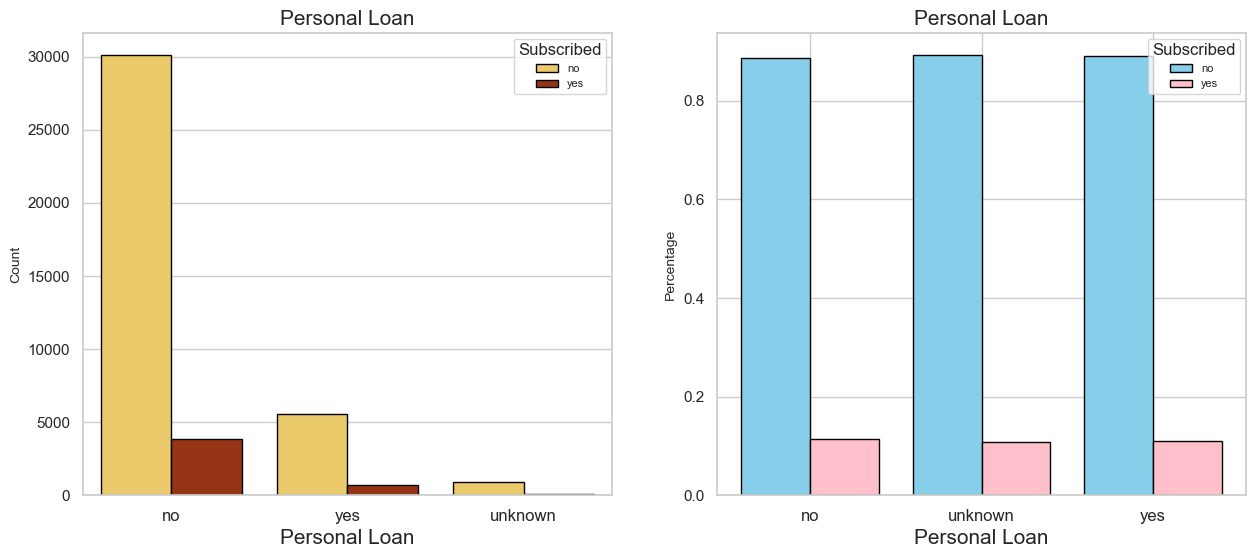

In [294]:
loan_result = df.groupby("loan")["y"].value_counts(normalize=True).unstack().fillna(0)
loan_labels = loan_result.index
x = range(len(loan_labels))
x_no = [i - 0.2 for i in x]  # Shift the "no" bars to the left
x_yes = [i + 0.2 for i in x] # Shift the "yes" bars to the right


plt.figure(figsize=(15, 6))


plt.subplot(1,2,1)
sns.countplot(data=df, x='loan', hue='y',palette='afmhot_r', edgecolor='black')
plt.title("Personal Loan",fontsize=15)
plt.xlabel("Personal Loan", fontsize=15)
plt.ylabel("Count", fontsize=10)
plt.xticks(fontsize=12)
plt.legend(title='Subscribed', fontsize=8, loc='upper right')


plt.subplot(1,2,2)
plt.bar(x_no, loan_result['no'], color='skyblue', edgecolor='black', width=0.4, label="no")
plt.bar(x_yes, loan_result['yes'], color='pink', edgecolor='black', width=0.4, label="yes")

plt.title("Personal Loan", fontsize=15)
plt.xlabel("Personal Loan", fontsize=15)
plt.ylabel("Percentage", fontsize=10)
plt.xticks(x, default_labels, fontsize=12)
plt.legend(title='Subscribed', fontsize=8, loc='upper right')



plt.show()

* **Majority people doesn't have personal Loan**

In [263]:
df['contact'].value_counts()

cellular     26144
telephone    15044
Name: contact, dtype: int64

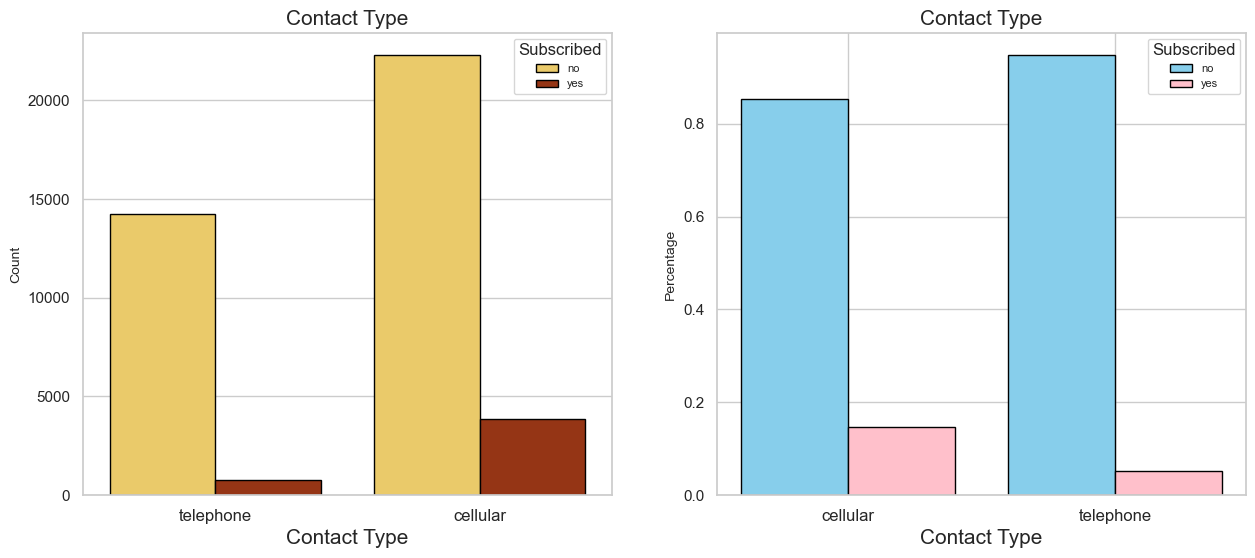

In [293]:
contact_result = df.groupby("contact")["y"].value_counts(normalize=True).unstack().fillna(0)
contact_labels = contact_result.index
x = range(len(contact_labels))
x_no = [i - 0.2 for i in x]  # Shift the "no" bars to the left
x_yes = [i + 0.2 for i in x] # Shift the "yes" bars to the right


plt.figure(figsize=(15, 6))


plt.subplot(1,2,1)
sns.countplot(data=df, x='contact', hue='y',palette='afmhot_r', edgecolor='black')
plt.title("Contact Type",fontsize=15)
plt.xlabel("Contact Type", fontsize=15)
plt.ylabel("Count", fontsize=10)
plt.xticks(fontsize=12)
plt.legend(title='Subscribed', fontsize=8, loc='upper right')


plt.subplot(1,2,2)
plt.bar(x_no, contact_result['no'], color='skyblue', edgecolor='black', width=0.4, label="no")
plt.bar(x_yes, contact_result['yes'], color='pink', edgecolor='black', width=0.4, label="yes")

plt.title("Contact Type", fontsize=15)
plt.xlabel("Contact Type", fontsize=15)
plt.ylabel("Percentage", fontsize=10)
plt.xticks(x, contact_labels, fontsize=12)
plt.legend(title='Subscribed', fontsize=8, loc='upper right')



plt.show()

* **People are contacted through cell phones are higher**
* **Chances of Subscribing to a term deposit will be higher when contacted through cell phone**

In [265]:
df['poutcome'].value_counts()

nonexistent    35563
failure         4252
success         1373
Name: poutcome, dtype: int64

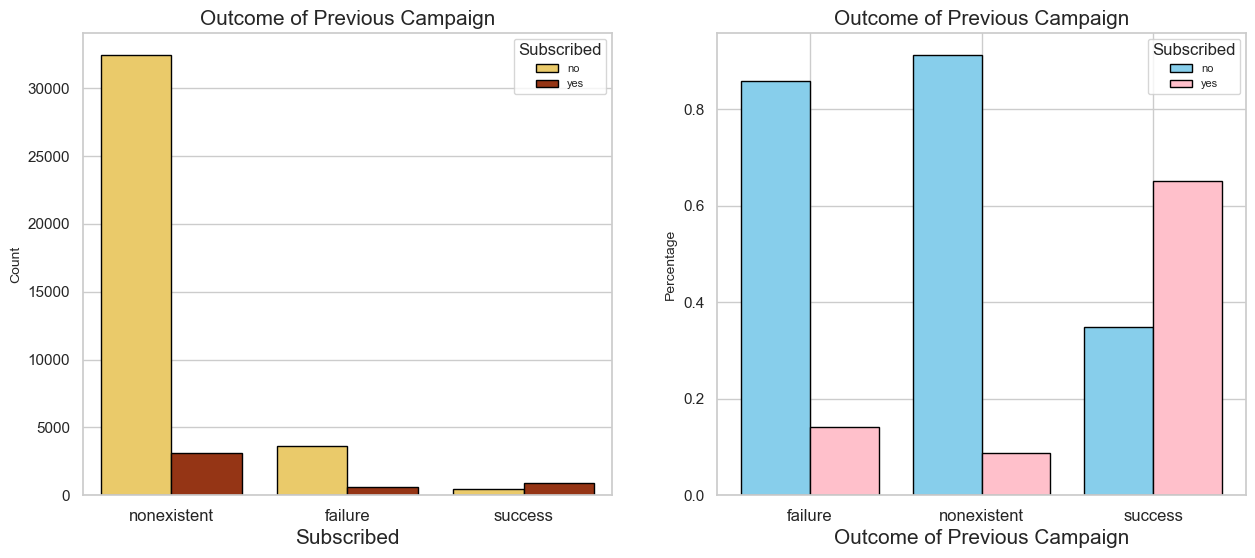

In [276]:
poutcome_result = df.groupby("poutcome")["y"].value_counts(normalize=True).unstack().fillna(0)
poutcome_labels = poutcome_result.index
x = range(len(poutcome_labels))
x_no = [i - 0.2 for i in x]  # Shift the "no" bars to the left
x_yes = [i + 0.2 for i in x] # Shift the "yes" bars to the right


plt.figure(figsize=(15, 6))


plt.subplot(1,2,1)
sns.countplot(data=df, x='poutcome', hue='y',palette='afmhot_r', edgecolor='black')
plt.title("Outcome of Previous Campaign",fontsize=15)
plt.xlabel("Outcome of Previous Campaign", fontsize=15)
plt.ylabel("Count", fontsize=10)
plt.xticks(fontsize=12)
plt.legend(title='Subscribed', fontsize=8, loc='upper right')


plt.subplot(1,2,2)
plt.bar(x_no, poutcome_result['no'], color='skyblue', edgecolor='black', width=0.4, label="no")
plt.bar(x_yes, poutcome_result['yes'], color='pink', edgecolor='black', width=0.4, label="yes")

plt.title("Outcome of Previous Campaign", fontsize=15)
plt.xlabel("Outcome of Previous Campaign", fontsize=15)
plt.ylabel("Percentage", fontsize=10)
plt.xticks(x, poutcome_labels, fontsize=12)
plt.legend(title='Subscribed', fontsize=8, loc='upper right')



plt.show()

* **Successful Previous Campaign again led to customer for a Term Deposit.**

In [283]:
df['education'].value_counts()

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64

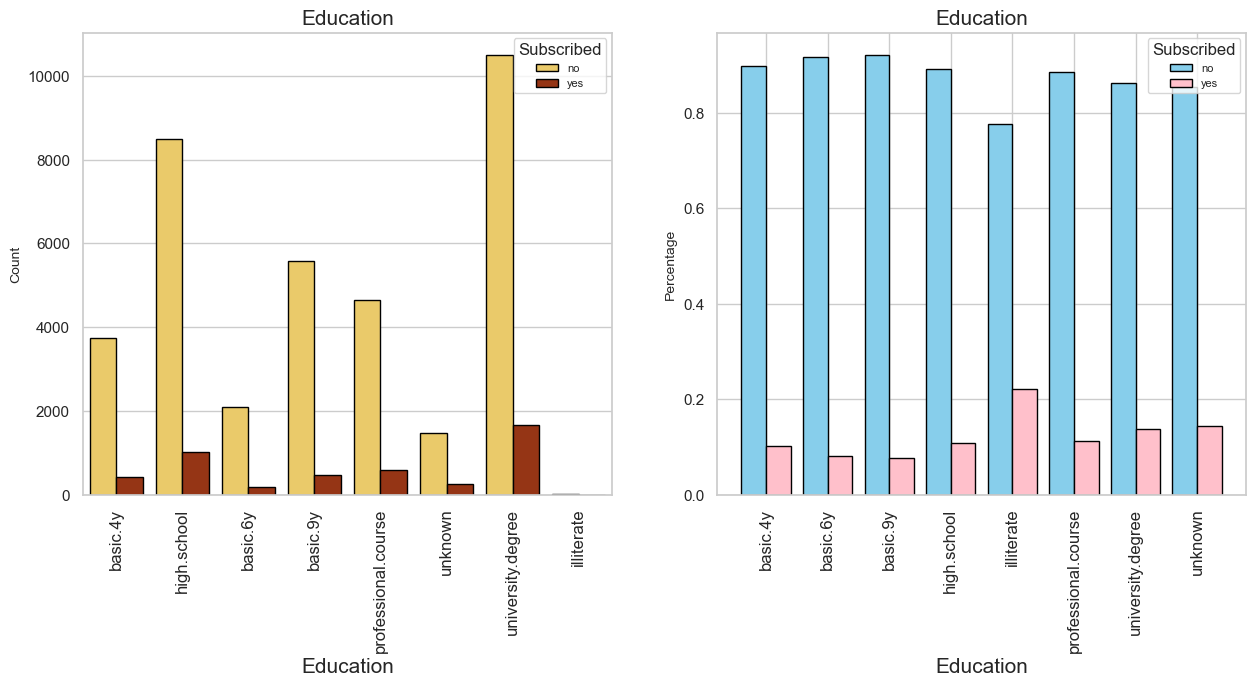

In [292]:
education_result = df.groupby("education")["y"].value_counts(normalize=True).unstack().fillna(0)
education_labels = education_result.index
x = range(len(education_labels))
x_no = [i - 0.2 for i in x]  # Shift the "no" bars to the left
x_yes = [i + 0.2 for i in x] # Shift the "yes" bars to the right


plt.figure(figsize=(15, 6))


plt.subplot(1,2,1)
sns.countplot(data=df, x='education', hue='y',palette='afmhot_r', edgecolor='black')
plt.title("Education",fontsize=15)
plt.xlabel("Education", fontsize=15)
plt.ylabel("Count", fontsize=10)
plt.xticks(fontsize=12, rotation=90)
plt.legend(title='Subscribed', fontsize=8, loc='upper right')


plt.subplot(1,2,2)
plt.bar(x_no, education_result['no'], color='skyblue', edgecolor='black', width=0.4, label="no")
plt.bar(x_yes, education_result['yes'], color='pink', edgecolor='black', width=0.4, label="yes")

plt.title("Education", fontsize=15)
plt.xlabel("Education", fontsize=15)
plt.ylabel("Percentage", fontsize=10)
plt.xticks(x, education_labels, fontsize=12, rotation=90)
plt.legend(title='Subscribed', fontsize=8, loc='upper right')



plt.show()

* **Maximum People are Having University Degree.**
* **Evenly Distributed amond education type**

In [287]:
df['job'].value_counts()

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

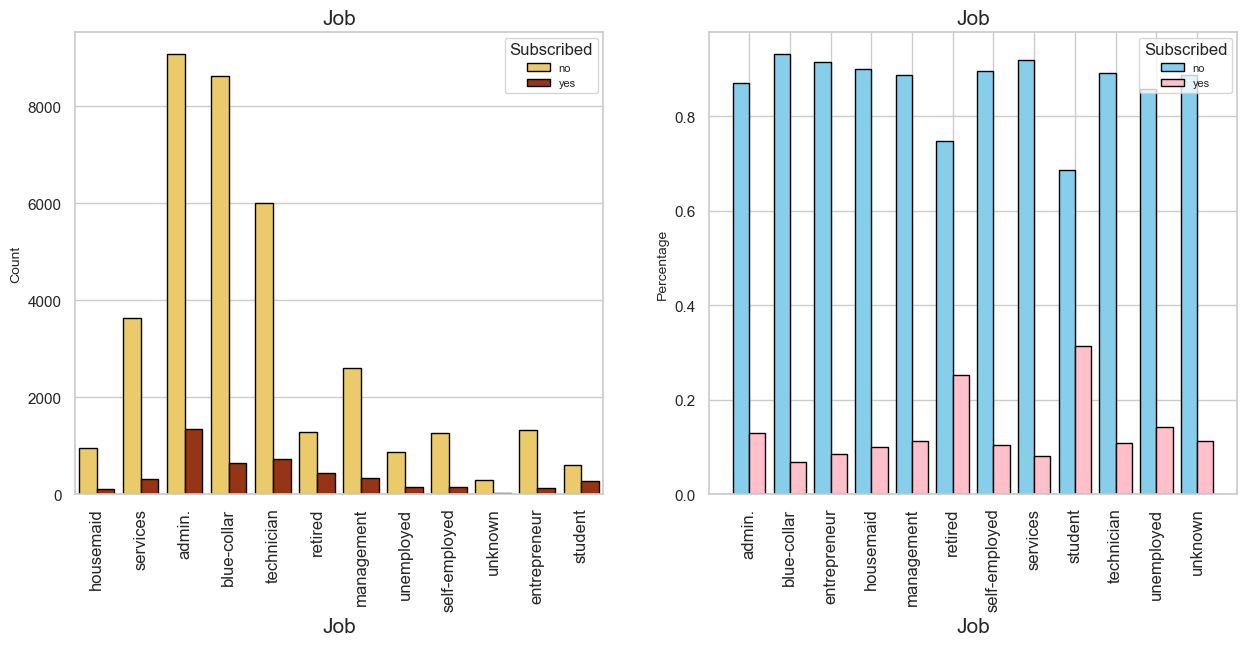

In [291]:
job_result = df.groupby("job")["y"].value_counts(normalize=True).unstack().fillna(0)
job_labels = job_result.index
x = range(len(job_labels))
x_no = [i - 0.2 for i in x]  # Shift the "no" bars to the left
x_yes = [i + 0.2 for i in x] # Shift the "yes" bars to the right


plt.figure(figsize=(15, 6))


plt.subplot(1,2,1)
sns.countplot(data=df, x='job', hue='y',palette='afmhot_r', edgecolor='black')
plt.title("Job",fontsize=15)
plt.xlabel("Job", fontsize=15)
plt.ylabel("Count", fontsize=10)
plt.xticks(fontsize=12, rotation=90)
plt.legend(title='Subscribed', fontsize=8, loc='upper right')


plt.subplot(1,2,2)
plt.bar(x_no, job_result['no'], color='skyblue', edgecolor='black', width=0.4, label="no")
plt.bar(x_yes, job_result['yes'], color='pink', edgecolor='black', width=0.4, label="yes")

plt.title("Job", fontsize=15)
plt.xlabel("Job", fontsize=15)
plt.ylabel("Percentage", fontsize=10)
plt.xticks(x, job_labels, fontsize=12, rotation=90)
plt.legend(title='Subscribed', fontsize=8, loc='upper right')



plt.show()

* **Maximum People are Admin, Blue-Collar, Technician**
* **Retired people and Students are much likely to get Term Deposit**

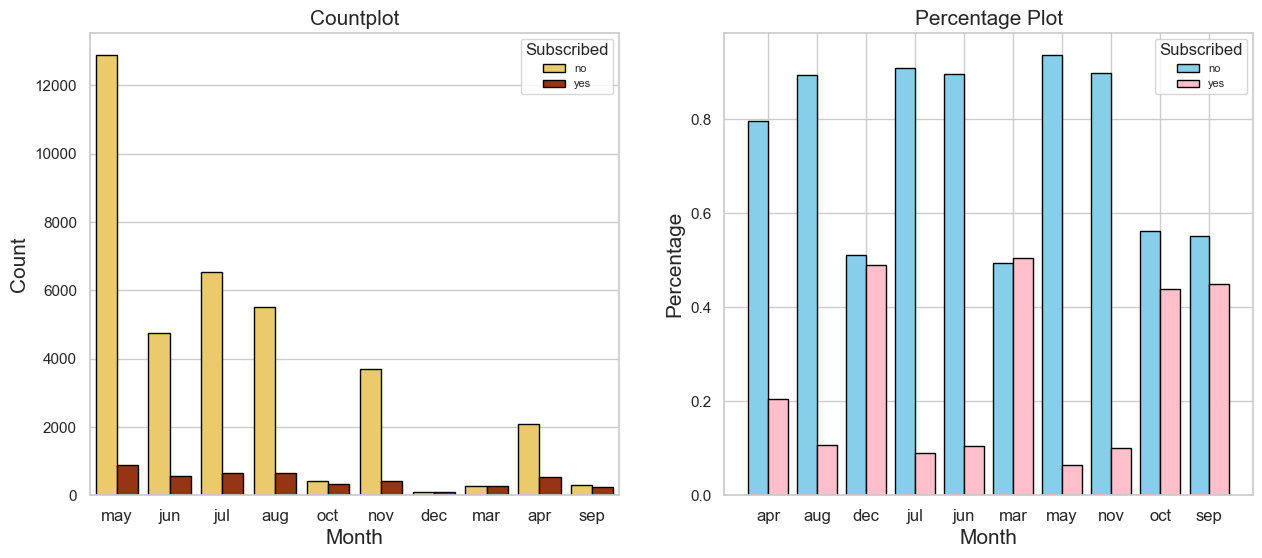

In [647]:
month_result = df.groupby("month")["y"].value_counts(normalize=True).unstack().fillna(0)
month_labels = month_result.index
x = range(len(month_labels))
x_no = [i - 0.2 for i in x]  # Shift the "no" bars to the left
x_yes = [i + 0.2 for i in x] # Shift the "yes" bars to the right


plt.figure(figsize=(15, 6))


plt.subplot(1,2,1)
sns.countplot(data=df, x='month', hue='y',palette='afmhot_r', edgecolor='black')
plt.title("Countplot",fontsize=15)
plt.xlabel("Month", fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.xticks(fontsize=12)
plt.legend(title='Subscribed', fontsize=8, loc='upper right')


plt.subplot(1,2,2)
plt.bar(x_no, month_result['no'], color='skyblue', edgecolor='black', width=0.4, label="no")
plt.bar(x_yes, month_result['yes'], color='pink', edgecolor='black', width=0.4, label="yes")

plt.title("Percentage Plot", fontsize=15)
plt.xlabel("Month", fontsize=15)
plt.ylabel("Percentage", fontsize=15)
plt.xticks(x, month_labels, fontsize=12)
plt.legend(title='Subscribed', fontsize=8, loc='upper right')



plt.show()

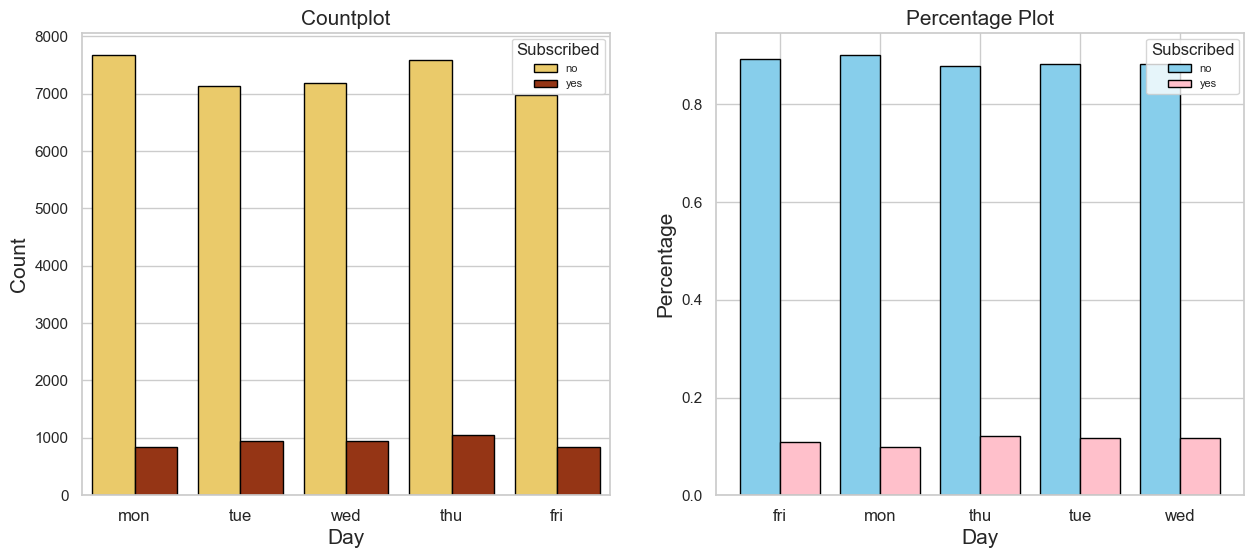

In [646]:
dow_result = df.groupby("day_of_week")["y"].value_counts(normalize=True).unstack().fillna(0)
dow_labels = dow_result.index
x = range(len(dow_labels))
x_no = [i - 0.2 for i in x]  # Shift the "no" bars to the left
x_yes = [i + 0.2 for i in x] # Shift the "yes" bars to the right


plt.figure(figsize=(15, 6))


plt.subplot(1,2,1)
sns.countplot(data=df, x='day_of_week', hue='y',palette='afmhot_r', edgecolor='black')
plt.title("Countplot",fontsize=15)
plt.xlabel("Day", fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.xticks(fontsize=12)
plt.legend(title='Subscribed', fontsize=8, loc='upper right')

plt.subplot(1,2,2)
plt.bar(x_no, dow_result['no'], color='skyblue', edgecolor='black', width=0.4, label="no")
plt.bar(x_yes, dow_result['yes'], color='pink', edgecolor='black', width=0.4, label="yes")
plt.title("Percentage Plot", fontsize=15)
plt.xlabel("Day", fontsize=15)
plt.ylabel("Percentage", fontsize=15)
plt.xticks(x, dow_labels, fontsize=12)
plt.legend(title='Subscribed', fontsize=8, loc='upper right')



plt.show()